# Initial Preparation

## Importing Modules and Libraries

In [1]:
# Import Pandas
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('use_inf_as_na', True)
pd.set_option('display.max_columns', None)

# Import Sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE, RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import matthews_corrcoef, make_scorer, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, PrecisionRecallDisplay

# Import Time module
import time

# Import MatPLotLib
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
# Import Seaborn
import seaborn as sns

# Import NumPy
import numpy as np
np.random.seed(11)

# Import Keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.optimizers import Adadelta, Adagrad, Adam, Adamax
from scikeras.wrappers import KerasClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

# Import os
import os

## Data Loading

Assign file names

In [2]:
application_path = r"C:\Users\ricar\Documents\Career\UK\Birkbeck - Data Science MSc\Year 2\Project\02. Databases\Home Credit\application_train.csv"
bureau_path = r"C:\Users\ricar\Documents\Career\UK\Birkbeck - Data Science MSc\Year 2\Project\02. Databases\Home Credit\bureau.csv"


Read CSV files to a Pandas dataframe

In [3]:
application_dataframe = pd.read_csv(application_path)
bureau_dataframe = pd.read_csv(bureau_path)

Visualise application_dataframe

In [4]:
application_dataframe.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,"-3,648.00",-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,"-1,134.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,"-1,186.00",-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,"-4,260.00",-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0

In [5]:
application_dataframe.shape

(307511, 122)

Visualise bureau_dataframe

In [6]:
bureau_dataframe.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.00,-153.00,NaN,0,"91,323.00",0.00,NaN,0.00,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,"1,075.00",NaN,NaN,0,"225,000.00","171,342.00",NaN,0.00,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.00,NaN,NaN,0,"464,323.50",NaN,NaN,0.00,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,"90,000.00",NaN,NaN,0.00,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,"1,197.00",NaN,"77,674.50",0,"2,700,000.00",NaN,NaN,0.00,Consumer credit,-21,NaN


In [7]:
bureau_dataframe.shape

(1716428, 17)

In [8]:
bureau_dataframe.groupby("CREDIT_ACTIVE")["SK_ID_CURR"].count()

CREDIT_ACTIVE
Active       630607
Bad debt         21
Closed      1079273
Sold           6527
Name: SK_ID_CURR, dtype: int64

## Manipulate and merge Bureau data to Application data

Group Bureau data by SK_ID_CURR to have unique keys to be joined to Application data.
Take MAX of each indicator as the worst case for each loan.


In [9]:
bureau_dataframe_max = bureau_dataframe.assign(
 DAYS_CREDIT_BUR = bureau_dataframe['DAYS_CREDIT'],
 CREDIT_DAY_OVERDUE_BUR = bureau_dataframe['CREDIT_DAY_OVERDUE'],
 DAYS_CREDIT_ENDDATE_BUR = bureau_dataframe['DAYS_CREDIT_ENDDATE'],
 DAYS_ENDDATE_FACT_BUR = bureau_dataframe['DAYS_ENDDATE_FACT'],
 AMT_CREDIT_SUM_BUR = bureau_dataframe['AMT_CREDIT_SUM'],
 AMT_CREDIT_SUM_DEBT_BUR = bureau_dataframe['AMT_CREDIT_SUM_DEBT'],
 AMT_CREDIT_SUM_LIMIT_BUR = bureau_dataframe['AMT_CREDIT_SUM_LIMIT'],
 AMT_ANNUITY_BUR = bureau_dataframe['AMT_ANNUITY'],
 AMT_CREDIT_SUM_OVERDUE_BUR = bureau_dataframe['AMT_CREDIT_SUM_OVERDUE'],
 NUMBER_OF_ACTIVE_LOANS_BUR = np.where(bureau_dataframe['CREDIT_ACTIVE']=='Active',1,0),
 NUMBER_OF_CLOSED_LOANS_BUR = np.where(bureau_dataframe['CREDIT_ACTIVE']=='Closed',1,0)).groupby('SK_ID_CURR').agg({
    'DAYS_CREDIT_BUR':max,
    'CREDIT_DAY_OVERDUE_BUR':max,
    'DAYS_CREDIT_ENDDATE_BUR':max,
    'DAYS_ENDDATE_FACT_BUR':max,
    'AMT_CREDIT_SUM_BUR':sum,
    'AMT_ANNUITY_BUR': sum,
    'AMT_CREDIT_SUM_DEBT_BUR':sum,
    'AMT_CREDIT_SUM_LIMIT_BUR':sum,
    'AMT_CREDIT_SUM_OVERDUE_BUR':sum,
    'NUMBER_OF_ACTIVE_LOANS_BUR':sum,
    'NUMBER_OF_CLOSED_LOANS_BUR':sum})

bureau_dataframe_max.reset_index()

,SK_ID_CURR,DAYS_CREDIT_BUR,CREDIT_DAY_OVERDUE_BUR,DAYS_CREDIT_ENDDATE_BUR,DAYS_ENDDATE_FACT_BUR,AMT_CREDIT_SUM_BUR,AMT_ANNUITY_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_LIMIT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,NUMBER_OF_ACTIVE_LOANS_BUR,NUMBER_OF_CLOSED_LOANS_BUR
0,100001,-49,0,"1,778.00",-544.00,"1,453,365.00","24,817.50","596,686.50",0.00,0.00,3,4
1,100002,-103,0,780.00,-36.00,"865,055.56",0.00,"245,781.00","31,988.56",0.00,2,6
2,100003,-606,0,"1,216.00",-540.00,"1,017,400.50",0.00,0.00,"810,000.00",0.00,1,3
3,100004,-408,0,-382.00,-382.00,"189,037.80",0.00,0.00,0.00,0.00,0,2
4,100005,-62,0,"1,324.00",-123.00,"657,126.00","4,261.50","568,408.50",0.00,0.00,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,-483,0,"1,363.00",-291.00,"3,693,858.66",0.00,"163,071.00",0.00,0.00,2,11
305807,456250,-760,0,"2,340.00",-760.00,"3,086,459.55","463,703.90","2,232,040.09","58,268.39",0.00,2,1
305808,456253,-713,0,"1,113.00",-794.00,"3,960,000.00","175,108.50","1,795,833.00",0.00,0.00,2,2
305809,456254,-1104,0,-859.00,-859.00,"45,000.00",0.00,0.00,0.00,0.00,0,1


In [10]:
bureau_dataframe_max.shape

(305811, 11)

Merge Bureau data to Application data

In [11]:
application_bureau_dataframe = application_dataframe.merge(bureau_dataframe_max, on='SK_ID_CURR', how='left')

Visualise merged data

In [12]:
application_bureau_dataframe.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_BUR,CREDIT_DAY_OVERDUE_BUR,DAYS_CREDIT_ENDDATE_BUR,DAYS_ENDDATE_FACT_BUR,AMT_CREDIT_SUM_BUR,AMT_ANNUITY_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_LIMIT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,NUMBER_OF_ACTIVE_LOANS_BUR,NUMBER_OF_CLOSED_LOANS_BUR
0,100002,1,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,"-3,648.00",-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,"-1,134.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,-103.00,0.00,780.00,-36.00,"865,055.56",0.00,"245,781.00","31,988.56",0.00,2.00,6.00
1,100003,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,"-1,186.00",-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,-606.00,0.00,"1,216.00",-540.00,"1,017,400.50",0.00,0.00,"810,000.00",0.00,1.00,3.00
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccom

In [13]:
application_bureau_dataframe.shape

(307511, 133)

# Create New Class Variable (Target)

In [14]:
application_bureau_dataframe = application_bureau_dataframe.assign(
    TARGET_NEW = np.where((application_bureau_dataframe['CREDIT_DAY_OVERDUE_BUR'] <= 0) &
                          (application_bureau_dataframe['TARGET'] == 1), 1, 0))

Bring new class to the front

In [15]:
col = application_bureau_dataframe.pop("TARGET_NEW")
application_bureau_dataframe.insert(1, col.name, col)

In [16]:
application_bureau_dataframe.head()

,SK_ID_CURR,TARGET_NEW,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_BUR,CREDIT_DAY_OVERDUE_BUR,DAYS_CREDIT_ENDDATE_BUR,DAYS_ENDDATE_FACT_BUR,AMT_CREDIT_SUM_BUR,AMT_ANNUITY_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_LIMIT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,NUMBER_OF_ACTIVE_LOANS_BUR,NUMBER_OF_CLOSED_LOANS_BUR
0,100002,1,1,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,"-3,648.00",-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,"-1,134.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,-103.00,0.00,780.00,-36.00,"865,055.56",0.00,"245,781.00","31,988.56",0.00,2.00,6.00
1,100003,0,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,"-1,186.00",-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,-606.00,0.00,"1,216.00",-540.00,"1,017,400.50",0.00,0.00,"810,000.00",0.00,1.00,3.00
2,100004,0,0,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00","13

Test TARGET_NEW

In [17]:
application_bureau_dataframe.loc[(application_bureau_dataframe['TARGET']==1) &
                                      (application_bureau_dataframe['CREDIT_DAY_OVERDUE_BUR']==0),
                                     ['TARGET', 'TARGET_NEW', 'CREDIT_DAY_OVERDUE_BUR']].head()

,TARGET,TARGET_NEW,CREDIT_DAY_OVERDUE_BUR
0,1,1,0.00
26,1,1,0.00
40,1,1,0.00
42,1,1,0.00
81,1,1,0.00


# Select Indebtedness Features Only

Selecting indebtedness and affordability variables only (key variables)

In [18]:
application_bureau_dataframe_key = application_bureau_dataframe[[
    "TARGET_NEW",
    "NAME_CONTRACT_TYPE",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "NAME_INCOME_TYPE",
    "NAME_HOUSING_TYPE",
    "DAYS_EMPLOYED",
    "OCCUPATION_TYPE",
    "CNT_FAM_MEMBERS",
    "ORGANIZATION_TYPE",
    "AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_QRT",
    "AMT_REQ_CREDIT_BUREAU_YEAR",
    "DAYS_CREDIT_BUR",
    "DAYS_CREDIT_ENDDATE_BUR",
    "DAYS_ENDDATE_FACT_BUR",
    "AMT_CREDIT_SUM_BUR",
    "AMT_CREDIT_SUM_DEBT_BUR",
    "AMT_CREDIT_SUM_LIMIT_BUR",
    "AMT_CREDIT_SUM_OVERDUE_BUR",
    "AMT_ANNUITY_BUR",
    "NUMBER_OF_ACTIVE_LOANS_BUR",
    "NUMBER_OF_CLOSED_LOANS_BUR"
]]

In [19]:
application_bureau_dataframe_key.head()

,TARGET_NEW,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_BUR,DAYS_CREDIT_ENDDATE_BUR,DAYS_ENDDATE_FACT_BUR,AMT_CREDIT_SUM_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_LIMIT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,AMT_ANNUITY_BUR,NUMBER_OF_ACTIVE_LOANS_BUR,NUMBER_OF_CLOSED_LOANS_BUR
0,1,Cash loans,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Working,House / apartment,-637,Laborers,1.00,Business Entity Type 3,0.00,0.00,0.00,0.00,0.00,1.00,-103.00,780.00,-36.00,"865,055.56","245,781.00","31,988.56",0.00,0.00,2.00,6.00
1,0,Cash loans,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",State servant,House / apartment,-1188,Core staff,2.00,School,0.00,0.00,0.00,0.00,0.00,0.00,-606.00,"1,216.00",-540.00,"1,017,400.50",0.00,"810,000.00",0.00,0.00,1.00,3.00
2,0,Revolving loans,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Working,House / apartment,-225,Laborers,1.00,Government,0.00,0.00,0.00,0.00,0.00,0.00,-408.00,-382.00,-382.00,"189,037.80",0.00,0.00,0.00,0.00,0.00,2.00
3,0,Cash loans,N,Y,0,"135,000.00","312,682.50","29,686.50","297,000.00",Working,House / apartment,-3039,Laborers,2.00,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,N,Y,0,"121,500.00","513,000.00","21,865.50","513,000.00",Working,House / apartment,-3038,Core staff,1.00,Religion,0.00,0.00,0.00,0.00,0.00,0.00,"-1,149.00",-783.00,-783.00,"146,250.00",0.00,0.00,0.00,0.00,0.00,1.00


In [20]:
application_bureau_dataframe_key.shape

(307511, 31)

Check type of each variable

# Manual Feature Engineering

Create variables by domain expertise

In [21]:
application_bureau_dataframe_key = application_bureau_dataframe_key.assign(
    APP_DEBT_TO_INCOME = application_bureau_dataframe_key['AMT_CREDIT'] / (application_bureau_dataframe_key['AMT_INCOME_TOTAL']*12),
    APP_ANNUITY_TO_INCOME = application_bureau_dataframe_key['AMT_ANNUITY'] / (application_bureau_dataframe_key['AMT_INCOME_TOTAL']*12),
    APP_TERM = application_bureau_dataframe_key['AMT_CREDIT'] / (application_bureau_dataframe_key['AMT_ANNUITY']*12),
    
    BUR_DEBT_TO_INCOME = application_bureau_dataframe_key['AMT_CREDIT_SUM_BUR'] / (application_bureau_dataframe_key['AMT_INCOME_TOTAL']*12),
    BUR_LIM_TO_INCOME = application_bureau_dataframe_key['AMT_CREDIT_SUM_LIMIT_BUR'] / (application_bureau_dataframe_key['AMT_INCOME_TOTAL']*12),
    BUR_ANNUITY_TO_INCOME = application_bureau_dataframe_key['AMT_ANNUITY_BUR'] / (application_bureau_dataframe_key['AMT_INCOME_TOTAL']*12),
    BUR_TERM = application_bureau_dataframe_key['AMT_CREDIT_SUM_BUR'] / application_bureau_dataframe_key['AMT_ANNUITY_BUR'])

application_bureau_dataframe_key.head()

,TARGET_NEW,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_BUR,DAYS_CREDIT_ENDDATE_BUR,DAYS_ENDDATE_FACT_BUR,AMT_CREDIT_SUM_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_LIMIT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,AMT_ANNUITY_BUR,NUMBER_OF_ACTIVE_LOANS_BUR,NUMBER_OF_CLOSED_LOANS_BUR,APP_DEBT_TO_INCOME,APP_ANNUITY_TO_INCOME,APP_TERM,BUR_DEBT_TO_INCOME,BUR_LIM_TO_INCOME,BUR_ANNUITY_TO_INCOME,BUR_TERM
0,1,Cash loans,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Working,House / apartment,-637,Laborers,1.00,Business Entity Type 3,0.00,0.00,0.00,0.00,0.00,1.00,-103.00,780.00,-36.00,"865,055.56","245,781.00","31,988.56",0.00,0.00,2.00,6.00,0.17,0.01,1.37,0.36,0.01,0.00,NaN
1,0,Cash loans,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",State servant,House / apartment,-1188,Core staff,2.00,School,0.00,0.00,0.00,0.00,0.00,0.00,-606.00,"1,216.00",-540.00,"1,017,400.50",0.00,"810,000.00",0.00,0.00,1.00,3.00,0.40,0.01,3.02,0.31,0.25,0.00,NaN
2,0,Revolving loans,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Working,House / apartment,-225,Laborers,1.00,Government,0.00,0.00,0.00,0.00,0.00,0.00,-408.00,-382.00,-382.00,"189,037.80",0.00,0.00,0.00,0.00,0.00,2.00,0.17,0.01,1.67,0.23,0.00,0.00,NaN
3,0,Cash loans,N,Y,0,"135,000.00","312,682.50","29,686.50","297,000.00",Working,House / apartment,-3039,Laborers,2.00,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,0.02,0.88,NaN,NaN,NaN,NaN
4,0,Cash loans,N,Y,0,"121,500.00","513,000.00","21,865.50","513,000.00",Working,House / apartment,-3038,Core staff,1.00,Religion,0.00,0.00,0.00,0.00,0.00,0.00,"-1,149.00",-783.00,-783.00,"146,250.00",0.00,0.00,0.00,0.00,0.00,1.00,0.35,0.01,1.96,0.10,0.00,0.00,NaN


# Explanatory Data Analysis

## Aggregated Measures

Number of datapoints and dimensions

In [22]:
application_bureau_dataframe_key.shape

(307511, 38)

Analysing data types

In [23]:
application_bureau_dataframe_key.dtypes.value_counts()

float64    28
object      7
int64       2
int32       1
dtype: int64

## Analysing Mising Datapoints

% missing for variables with > xx%

In [24]:
null_perc = application_bureau_dataframe_key.isnull().sum()/len(application_bureau_dataframe_key)
null_perc_sorted = null_perc.sort_values(ascending=False).to_frame('Missing %')

null_perc_sorted.style.format({'Missing %': '{:,.2%}'.format})

,Missing %
BUR_TERM,80.40%
OCCUPATION_TYPE,31.35%
DAYS_ENDDATE_FACT_BUR,25.09%
DAYS_CREDIT_ENDDATE_BUR,15.05%
AMT_CREDIT_SUM_LIMIT_BUR,14.31%
DAYS_CREDIT_BUR,14.31%
AMT_CREDIT_SUM_BUR,14.31%
AMT_CREDIT_SUM_DEBT_BUR,14.31%
AMT_CREDIT_SUM_OVERDUE_BUR,14.31%
AMT_ANNUITY_BUR,14.31%


Number of variables with missing > xx%

In [25]:
print(len(null_perc_sorted))

38


Visualise % missing for variables with > 10%

Text(0.5, 1.0, 'Variables with more than 14.0% missing')

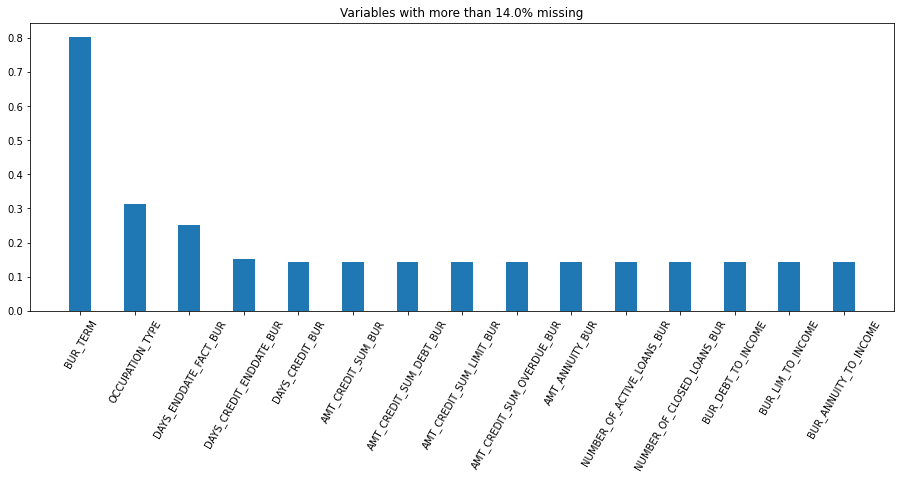

In [26]:
perc_missing = 0.14
null_perc_sorted = null_perc[null_perc > perc_missing].sort_values(ascending=False)

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])

ax.bar(null_perc_sorted.index, null_perc_sorted, width=0.4)
plt.xticks(rotation = 60)
plt.title(f"Variables with more than {round(perc_missing*100, 0)}% missing")

## Univariate Analysis

### Basic Statistics - Numeric Variables

In [27]:
application_bureau_dataframe_key[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                  'CNT_FAM_MEMBERS', 'DAYS_CREDIT_BUR', 'APP_DEBT_TO_INCOME', 'APP_TERM']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,"307,511.00","168,797.92","237,123.15","25,650.00","112,500.00","147,150.00","202,500.00","117,000,000.00"
AMT_CREDIT,"307,511.00","599,026.00","402,490.78","45,000.00","270,000.00","513,531.00","808,650.00","4,050,000.00"
AMT_ANNUITY,"307,499.00","27,108.57","14,493.74","1,615.50","16,524.00","24,903.00","34,596.00","258,025.50"
AMT_GOODS_PRICE,"307,233.00","538,396.21","369,446.46","40,500.00","238,500.00","450,000.00","679,500.00","4,050,000.00"
CNT_FAM_MEMBERS,"307,509.00",2.15,0.91,1.00,2.00,2.00,3.00,20.00
DAYS_CREDIT_BUR,"263,491.00",-489.30,537.57,"-2,922.00",-620.00,-300.00,-143.00,0.00
APP_DEBT_TO_INCOME,"307,511.00",0.33,0.22,0.00,0.17,0.27,0.43,7.06
APP_TERM,"307,499.00",1.80,0.65,0.67,1.30,1.67,2.26,3.78


### Charts and Plots

#### Continuous variables

Text(0.5, 1.0, 'APP_DEBT_TO_INCOME')

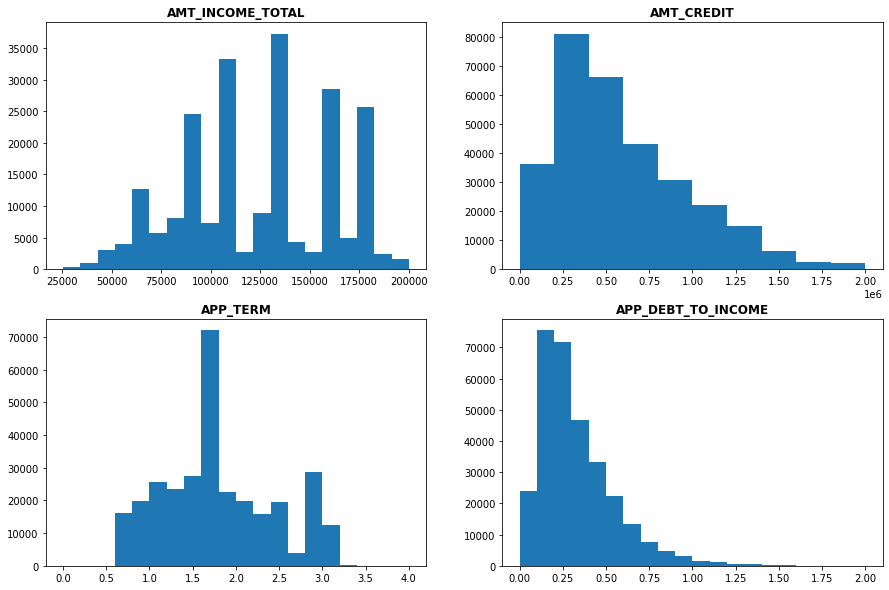

In [28]:
figure, axis = plt.subplots(2, 2, figsize=(15, 10))
figure

axis[0, 0].hist(data=application_bureau_dataframe_key, x="AMT_INCOME_TOTAL", bins=20, range=(25500, 200000))
axis[0, 0].set_title("AMT_INCOME_TOTAL", fontdict={'fontsize': 12,
                                                   'fontweight': 'bold',
                                                   })

axis[0, 1].hist(data=application_bureau_dataframe_key, x="AMT_CREDIT", bins=10, range=(0, 2000000))
axis[0, 1].set_title("AMT_CREDIT", fontdict={'fontsize': 12,
                                                   'fontweight': 'bold',
                                                   })

axis[1, 0].hist(data=application_bureau_dataframe_key, x="APP_TERM", bins=20, range=(0, 4))
axis[1, 0].set_title("APP_TERM", fontdict={'fontsize': 12,
                                                   'fontweight': 'bold',
                                                   })

axis[1, 1].hist(data=application_bureau_dataframe_key, x="APP_DEBT_TO_INCOME", bins=20, range=(0, 2))
axis[1, 1].set_title("APP_DEBT_TO_INCOME", fontdict={'fontsize': 12,
                                                   'fontweight': 'bold',
                                                   })


#### Categorical variables

In [29]:
def calc_percent(var, pc_lim):
    counts = application_bureau_dataframe_key[var].value_counts()
    values = list(counts)
    labels = list(counts.index)
    
    
    percents = list()
    for value in values:
        pc = value/sum(values)
        percents.append(pc)
        
    label_pc = list(zip(labels,percents))
    labels_final = list()
    values_final = list()

    for mytuple in label_pc:
        if mytuple[1] >= pc_lim:
            labels_final.append(mytuple[0])
            values_final.append(mytuple[1])
    
    
    return labels_final, values_final

print(calc_percent('CNT_FAM_MEMBERS', 0.1)[0])
print(calc_percent('CNT_FAM_MEMBERS', 0.1)[1])

[2.0, 1.0, 3.0]
[0.5149670416150421, 0.22063419282037275, 0.1710551561092521]


Text(0.5, 1.0, 'NAME_INCOME_TYPE')

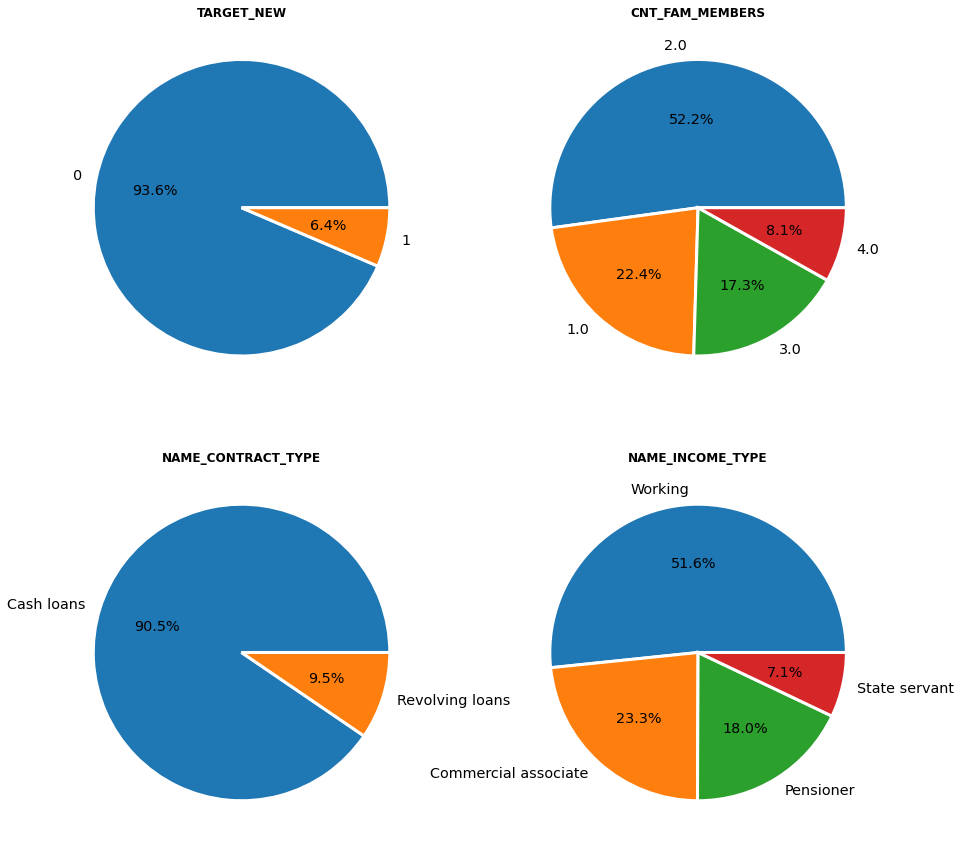

In [30]:
def calc_percent(var, pc_lim):
    counts = application_bureau_dataframe_key[var].value_counts()
    values = list(counts)
    labels = list(counts.index)
    
    
    percents = list()
    for value in values:
        pc = value/sum(values)
        percents.append(pc)
        
    label_pc = list(zip(labels,percents))
    labels_final = list()
    values_final = list()

    for mytuple in label_pc:
        if mytuple[1] >= pc_lim:
            labels_final.append(mytuple[0])
            values_final.append(mytuple[1])
    
    
    return labels_final, values_final



figure, axis = plt.subplots(2, 2, figsize=(15, 15))
figure.patch.set_facecolor('white')

axis[0, 0].pie(calc_percent("TARGET_NEW", 0)[1], labels = calc_percent("TARGET_NEW", 0)[0],
               autopct='%1.1f%%', shadow=False,
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'})
axis[0, 0].set_title("TARGET_NEW", fontweight="bold")


axis[0, 1].pie(calc_percent("CNT_FAM_MEMBERS", 0.05)[1], labels = calc_percent("CNT_FAM_MEMBERS", 0.05)[0],
               autopct='%1.1f%%', shadow=False,
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'})
axis[0, 1].set_title("CNT_FAM_MEMBERS", fontweight="bold")


axis[1, 0].pie(calc_percent("NAME_CONTRACT_TYPE", 0)[1], labels = calc_percent("NAME_CONTRACT_TYPE", 0)[0],
               autopct='%1.1f%%', shadow=False,
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'})
axis[1, 0].set_title("NAME_CONTRACT_TYPE", fontweight="bold")


axis[1, 1].pie(calc_percent("NAME_INCOME_TYPE", 0.05)[1], labels = calc_percent("NAME_INCOME_TYPE", 0.05)[0],
               autopct='%1.1f%%', shadow=False,
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'})
axis[1, 1].set_title("NAME_INCOME_TYPE", fontweight="bold")


#### Multivariate Analysis

Create function to selection of top N highest correlated features

Source: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

In [31]:
def get_feature_correlation(df, top_n=None, remove_duplicates=True, remove_self_correlations=True):
    """
    Compute the feature correlation and sort feature pairs based on their correlation

    :param df: The dataframe with the predictor variables
    :type df: pandas.core.frame.DataFrame
    :param top_n: Top N feature pairs to be reported (if None, all of the pairs will be returned)
    :param corr_method: Correlation compuation method
    :type corr_method: str
    :param remove_duplicates: Indicates whether duplicate features must be removed
    :type remove_duplicates: bool
    :param remove_self_correlations: Indicates whether self correlations will be removed
    :type remove_self_correlations: bool

    :return: pandas.core.frame.DataFrame
    """
    corr_matrix_abs = df.corr().abs()
    corr_matrix_abs_us = corr_matrix_abs.unstack()
    sorted_correlated_features = corr_matrix_abs_us \
        .sort_values(kind="quicksort", ascending=False) \
        .reset_index()

    # Remove comparisons of the same feature
    if remove_self_correlations:
        sorted_correlated_features = sorted_correlated_features[
            (sorted_correlated_features.level_0 != sorted_correlated_features.level_1)
        ]

    # Remove duplicates
    if remove_duplicates:
        sorted_correlated_features = sorted_correlated_features.iloc[:-2:2]

    # Create meaningful names for the columns
    sorted_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation (abs)']

    if top_n:
        return sorted_correlated_features[:top_n]

    return sorted_correlated_features


top_correlations_df = get_feature_correlation(application_bureau_dataframe_key.drop(['TARGET_NEW'], axis=1), 10)
top_correlations_features = top_correlations_df['Feature 1'].values
print(top_correlations_df)

                Feature 1                 Feature 2  Correlation (abs)
30        AMT_GOODS_PRICE                AMT_CREDIT               0.99
32  BUR_ANNUITY_TO_INCOME           AMT_ANNUITY_BUR               0.93
34        CNT_FAM_MEMBERS              CNT_CHILDREN               0.88
36     BUR_DEBT_TO_INCOME        AMT_CREDIT_SUM_BUR               0.86
38      BUR_LIM_TO_INCOME  AMT_CREDIT_SUM_LIMIT_BUR               0.85
40  APP_ANNUITY_TO_INCOME        APP_DEBT_TO_INCOME               0.79
42        AMT_GOODS_PRICE               AMT_ANNUITY               0.78
44            AMT_ANNUITY                AMT_CREDIT               0.77
46               APP_TERM                AMT_CREDIT               0.66
48             AMT_CREDIT        APP_DEBT_TO_INCOME               0.65


Create heatmap of the top N highest correlated features selected above

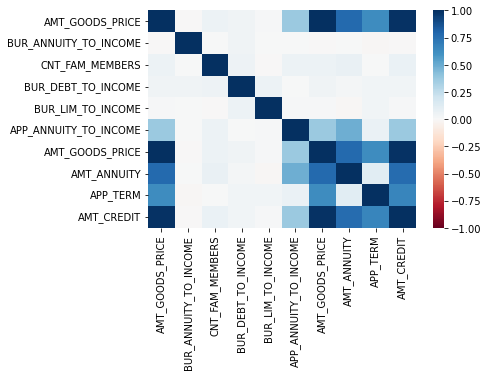

In [32]:
correlations = application_bureau_dataframe_key[top_correlations_features].corr()
ax = sns.heatmap(correlations, center=0, cmap="RdBu", vmin=-1, vmax=1, annot=False)

Drop AMT_GOODS_PRICE due to correlation to AMT_CREDIT

In [33]:
application_bureau_dataframe_key.shape

(307511, 38)

In [34]:
application_bureau_dataframe_key = application_bureau_dataframe_key.drop(['AMT_GOODS_PRICE'], axis=1)

In [35]:
application_bureau_dataframe_key.shape

(307511, 37)

# One-hot Encoding

Apply one-hot encoding to the following categorical variables:

OCCUPATION_TYPE                
NAME_HOUSING_TYPE              
NAME_INCOME_TYPE               
NAME_CONTRACT_TYPE             
ORGANIZATION_TYPE              

Then tranform 'Y' and 'N' to 1 and 0 for the following variables:

FLAG_OWN_REALTY                
FLAG_OWN_CAR                   

In [36]:
application_bureau_dataframe_key.select_dtypes(include="object").head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,Cash loans,N,Y,Working,House / apartment,Laborers,Business Entity Type 3
1,Cash loans,N,N,State servant,House / apartment,Core staff,School
2,Revolving loans,Y,Y,Working,House / apartment,Laborers,Government
3,Cash loans,N,Y,Working,House / apartment,Laborers,Business Entity Type 3
4,Cash loans,N,Y,Working,House / apartment,Core staff,Religion


In [37]:
cat_cols = ['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

application_bureau_dataframe_key = pd.get_dummies(application_bureau_dataframe_key, columns = cat_cols)
application_bureau_dataframe_key = application_bureau_dataframe_key.replace(
    {'FLAG_OWN_CAR': {'N': 0, 'Y': 1},
     'FLAG_OWN_REALTY': {'N': 0, 'Y': 1}
    })

In [38]:
application_bureau_dataframe_key.head()

,TARGET_NEW,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_BUR,DAYS_CREDIT_ENDDATE_BUR,DAYS_ENDDATE_FACT_BUR,AMT_CREDIT_SUM_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_LIMIT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,AMT_ANNUITY_BUR,NUMBER_OF_ACTIVE_LOANS_BUR,NUMBER_OF_CLOSED_LOANS_BUR,APP_DEBT_TO_INCOME,APP_ANNUITY_TO_INCOME,APP_TERM,BUR_DEBT_TO_INCOME,BUR_LIM_TO_INCOME,BUR_ANNUITY_TO_INCOME,BUR_TERM,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0,1,0,"202,500.00","406,597.50","24,700.50",-637,1.00,0.00,0.00,0.00,0.00,0.00,1.00,-103.00,780.00,-36.00,"865,055.56","245,781.00","31,988.56",0.00,0.00,2.00,6.00,0.17,0.01,1.37,0.36,0.01,0.00,NaN,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,"270,000.00","1,293,502.50","35,698.50",-1188,2.00,0.00,0.00,0.00,0.00,0.00,0.00,-606.00,"1,216.00",-540.00,"1,017,400.50",

In [39]:
application_bureau_dataframe_key.dtypes.value_counts()

uint8      92
float64    27
int64       4
int32       1
dtype: int64

# Deal with Missing Values

Most of missing values in this dataset comes from the bureau variables.
This happens when customers do not have credit history (thin file)
or do not have specific credit products such as Cards, e.g. resulting in
missing data for the AMT_CREDIT_SUM_LIMIT_MAX variable.

Solution: The model has to learn how to decision for these customers so I'll keep all these observations and fill them with 0's. If they don't have credit history, it is more likely that they are not heavily dependent on credit and are less likely to be overindebted.

In [40]:
application_bureau_dataframe_key = application_bureau_dataframe_key.fillna(0)

# Split Train and Test Data

## Create X and Y Dataframes

In [41]:
x = application_bureau_dataframe_key.iloc[:, 1:]
x.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_BUR,DAYS_CREDIT_ENDDATE_BUR,DAYS_ENDDATE_FACT_BUR,AMT_CREDIT_SUM_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_LIMIT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,AMT_ANNUITY_BUR,NUMBER_OF_ACTIVE_LOANS_BUR,NUMBER_OF_CLOSED_LOANS_BUR,APP_DEBT_TO_INCOME,APP_ANNUITY_TO_INCOME,APP_TERM,BUR_DEBT_TO_INCOME,BUR_LIM_TO_INCOME,BUR_ANNUITY_TO_INCOME,BUR_TERM,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,1,0,"202,500.00","406,597.50","24,700.50",-637,1.00,0.00,0.00,0.00,0.00,0.00,1.00,-103.00,780.00,-36.00,"865,055.56","245,781.00","31,988.56",0.00,0.00,2.00,6.00,0.17,0.01,1.37,0.36,0.01,0.00,0.00,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,"270,000.00","1,293,502.50","35,698.50",-1188,2.00,0.00,0.00,0.00,0.00,0.00,0.00,-606.00,"1,216.00",-540.00,"1,017,400.50",0.00,"810,000.

In [42]:
y = application_bureau_dataframe_key.loc[:, 'TARGET_NEW']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET_NEW, dtype: int32

## Apply Train Test Split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y, random_state=7)

In [44]:
x_train = x_train.reset_index(drop=True)
x_train.head()
# list(x_train.columns)

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_BUR,DAYS_CREDIT_ENDDATE_BUR,DAYS_ENDDATE_FACT_BUR,AMT_CREDIT_SUM_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_LIMIT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,AMT_ANNUITY_BUR,NUMBER_OF_ACTIVE_LOANS_BUR,NUMBER_OF_CLOSED_LOANS_BUR,APP_DEBT_TO_INCOME,APP_ANNUITY_TO_INCOME,APP_TERM,BUR_DEBT_TO_INCOME,BUR_LIM_TO_INCOME,BUR_ANNUITY_TO_INCOME,BUR_TERM,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,0,0,"85,500.00","126,000.00","12,402.00",365243,2.00,0.00,0.00,0.00,0.00,0.00,2.00,-246.00,"1,993.00",-243.00,"2,705,422.50","680,791.50",0.00,0.00,0.00,2.00,4.00,0.12,0.01,0.85,2.64,0.00,0.00,0.00,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,"135,000.00","545,040.00","31,419.00",-960,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.34,0.0

In [45]:
x_train.shape

(215257, 123)

In [46]:
x_test.shape

(92254, 123)

# Logistic Regression Model

## Create Pipeline: (Scaler + (Scaler -> PCA)) -> Logistic Regression

Use combination of pipeline and feature union to automatically concatenate the features generated by PCA to the original dataset afeter being scaled.
Feature union will run two processes in parallel: 1) scale x_train and output a scaled dataset; 2) scale x_train, generate features with PCA and output only these new features. After doing step 1) and 2) in parallel, feature union concatenates both into a final dataset with all original scaled variables + newly generated.

Create Pipelie with all steps to be used in the Grid Search CV

In [94]:
mypipeline = Pipeline(steps=[
    ('dtprocess', FeatureUnion([('scaler', StandardScaler()),('ScalerPCA', Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=100))]))])),
    ('ftrselect', 'passthrough'),
    ('logreg', LogisticRegression())])

Visualise the dataset created after the data pre-processing step

In [95]:
x_train_visual = mypipeline['dtprocess'].fit_transform(x_train)
x_train_visual = pd.DataFrame(x_train_visual)
x_train_visual.shape

(215257, 223)

In [96]:
x_train_visual.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222
0,-0.72,-1.50,-0.58,-0.75,-1.17,-1.01,2.13,-0.17,-0.07,-0.06,-0.15,-0.27,-0.29,0.19,0.33,-0.20,0.29,0.25,0.08,-0.22,-0.01,-0.05,0.13,0.31,-0.92,-0.38,-1.46,0.94,-0.22,-0.06,-0.01,0.32,-0.32,-0.00,-0.55,-0.00,2.13,-0.28,-0.01,-0.01,-1.03,-0.06,0.36,-0.19,-0.09,-0.13,-0.22,-0.18,-0.12,-0.14,-0.31,-0.25,-0.04,-0.20,-0.04,-0.47,-0.08,-0.27,-0.17,-0.09,-0.05,-0.34,-0.07,-0.15,-0.07,-0.04,-0.09,-0.09,-0.14,-0.19,-0.53,-0.03,-0.15,-0.04,-0.06,-0.04,-0.19,-0.06,-0.10,-0.06,-0.02,-0.09,-0.03,-0.01,-0.04,-0.10,-0.05,-0.04,-0.02,-0.07,-0.01,-0.10,-0.04,-0.15,-0.03,-0.19,-0.09,-0.03,-0.24,-0.09,-0.08,-0.04,-0.02,-0.08,-0.17,-0.10,-0.08,-0.38,-0.07,-0.04,-0.03,-0.08,-0.11,-0.01,-0.01,-0.05,-0.16,-0.03,-0.08,-0.06,-0.13,-0.07,2.13,-3.86,-1.02,2.07,-0.33,0.26,0.37,0.51,-1.35,0.51,-0.52,-0.50,0.34,0.07,0.30,-0.22,-0.04,0.48,0.48,0.32,0.04,0.03,0.07,-0.10,0.08,0.12,0.05,-0.23,-0.28,-0.07,-0.05,-0.14,0.05,-0.04,0.18,-0.01,-0.08,-0.07,-0.13,-0.03,0.02,0.06,0.15,0.18,-0.14,0.00,-0.17,0.10,-0.03,-0.03,0.02,-0.05,0.01,-0.07,0.06,-0.02,-0.04,-0.03,0.01,0.01,-0.05,-0.04,0.03,0.03,-0.05,-0.01,0.04,-0.01,-0.00,0.04,0.07,-0.07,0.03,0.05,0.07,0.04,-0.22,-0.04,-0.01,-0.07,0.19,-0.09,-0.10,0.17,0.02,0.10,0.03,0.08,0.30,0.01,0.03,-0.17,0.85,0.07,0.02,0.13,-1.39,0.05,0.03,-0.02,0.04
1,1.39,0.67,-0.58,-0.30,-0.14,0.30,-0.46,-0.17,-0.07,-0.06,-0.15,-0.27,-0.29,-0.89,0.80,-0.43,0.77,-0.41,-0.35,-0.22,-0.01,-0.05,-0.98,-0.89,0.03,0.55,-0.55,-0.40,-0.22,-0.06,-0.01,0.32,-0.32,-0.00,-0.55,-0.00,-0.47,-0.28,-0.01,-0.01,0.97,-0.06,0.36,-0.19,-0.09,-0.13,-0.22,-0.18,-0.12,-0.14,-0.31,-0.25,-0.04,-0.20,-0.04,-0.47,-0.08,3.67,-0.17,-0.09,-0.05,-0.34,-0.07,-0.15,-0.07,-0.04,-0.09,-0.09,-0.14,-0.19,-0.53,-0.03,6.71,-0.04,-0.06,-0.04,-0.19,-0.06,-0.10,-0.06,-0.02,-0.09,-0.03,-0.01,-0.04,-0.10,-0.05,-0.04,-0.02,-0.07,-0.01,-0.10,-0.04,-0.15,-0.03,-0.19,-0.09,-0.03,-0.24,-0.09,-0.08,-0.04,-0.02,-0.08,-0.17,-0.10,-0.08,-0.38,-0.07,-0.04,-0.03,-0.08,-0.11,-0.01,-0.01,-0.05,-0.16,-0.03,-0.08,-0.06,-0.13,-0.07,-0.47,0.57,-0.17,-1.31,1.23,-0.43,-0.07,0.36,-0.56,-0.51,0.43,-0.26,-0.70,-1.87,-0.34,1.21,-0.13,0.12,0.73,0.69,2.12,1.09,-0.56,0.75,-0.60,0.99,-0.72,-0.17,0.83,1.02,1.01,1.28,-0.73,-0.68,0.19,2.06,-1.57,-0.23,-0.46,0.82,1.06,-0.78,1.91,-0.69,0.10,-0.29,-1.26,2.53,0.61,-0.01,-0.20,0.35,-1.12,-0.49,-0.91,-0.40,-0.25,-0.12,-0.02,0.15,0.37,-0.37,0.04,-0.16,0.07,0.03,0.05,-0.12,-0.25,0.23,-0.30,-0.39,0.16,-0.56,0.27,-0.28,-0.69,0.29,0.24,0.11,1.29,-0.19,1.14,0.02,-0.72,0.05,0.18,-0.95,0.41,-0.11,1.78,-0.15,1.80,0.24,-0.68,-1.53,1.41,0.03,0.56,0.18,-0.71
2,1.39,0.67,0.81,0.51,0.56,1.32,-0.47,0.93,-0.07,-0.06,-0.15,-0.27,-0.29,-0.89,-0.44,-0.28,0.23,0.00,-0.35,-0.22,-0.01,-0.05,-0.98,0.01,-0.11,0.26,-0.48,-0.08,-0.22,-0.06,-0.01,0.32,-0.32,-0.00,-0.55,-0.00,-0.47,-0.28,-0.01,-0.01,0.97,-0.06,0.36,-0.19,-0.09,-0.13,-0.22,-0.18,-0.12,-0.14,-0.31,-0.25,-0.04,-0.20,-0.04,-0.47,-0.08,3.67,-0.17,-0.09,-0.05,-0.34,-0.07,-0.15,-0.07,-0.04,-0.09,-0.09,-0.14,-0.19,-0.53,-0.03,-0.15,-0.04,-0.06,-0.04,-0.19,-0.06,-0.10,-0.06,-0.02,-0.09,-0.03,-0.01,-0.04,-0.10,-0.05,-0.04,-0.02,-0.07,-0.01,-0.10,-0.04,-0.15,-0.03,-0.19,-0.09,-0.03,-0.24,-0.09,-0.08,-0.04,-0.02,-0.08,-0.17,-0.10,-0.08,2.65,-0.07,-0.04,-0.03,-0.08,-0.11,-0.

## Define Parameters to be Tested

In [97]:
n_vars = [int(x) for x in np.linspace(start = 10, stop = 223, num = 10)]
print(n_vars)

[10, 33, 57, 81, 104, 128, 152, 175, 199, 223]


In [98]:
# Create grid with parameters to test accurracy using k-Fold CV
n_vars = [int(x) for x in np.linspace(start = 10, stop = 223, num = 10)]

myparamdists = [
        {"ftrselect": [SelectKBest(score_func = f_classif)],
        "ftrselect__k": n_vars,
        "logreg__solver": [
                            "liblinear",
                            "lbfgs"
                            ]},
    
        {"ftrselect": [RFE(estimator = DecisionTreeClassifier(), step = 0.2)],
        "ftrselect__n_features_to_select": n_vars,
        "logreg__solver": [
                            "liblinear",
                            "lbfgs"
                            ]}
                ]

myscoring = {
             "roc_auc": "roc_auc",
             "accuracy": "accuracy",
            }

sart_ttime = time.time()


mygrid = RandomizedSearchCV(mypipeline, myparamdists, n_iter=10, scoring=myscoring, refit="roc_auc", cv=3, n_jobs=-1, verbose=2, random_state=7)
mygrid.fit(x_train, y_train)

print(f"Time taken (m): {round((time.time()-sart_ttime)/60,0)}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Time taken (m): 44.0


Visualise Pipeline and RandomSearch

In [53]:
mygrid

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('dtprocess',
                                              FeatureUnion(transformer_list=[('scaler',
                                                                              StandardScaler()),
                                                                             ('ScalerPCA',
                                                                              Pipeline(steps=[('scaler',
                                                                                               StandardScaler()),
                                                                                              ('pca',
                                                                                               PCA(n_components=0.95))]))])),
                                             ('ftrselect', 'passthrough'),
                                             ('logreg', LogisticRegression())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions=[{'ftrselect': [SelectKBest()],
                                         'ft...
                                                          128, 152, 176, 200,
                                                          224],
                                         'logreg__solver': ['liblinear',
                                                            'lbfgs']},
                                        {'ftrselect': [RFE(estimator=DecisionTreeClassifier(),
                                                           n_features_to_select=176,
                                                           step=0.2)],
                                         'ftrselect__n_features_to_select': [10,
                                                                             33,
                                                                             57,
                                                                             81,
                                                                             105,
                                                                             128,
                                                                             152,
                                                                             176,
                                                                             200,
                                                                             224],
                                         'logreg__solver': ['liblinear',
                                                            'lbfgs']}],
                   random_state=7, refit='roc_auc',
                   scoring={'accuracy': 'accuracy', 'roc_auc': 'roc_auc'},
                   verbose=2)

## Review Grid Search Results and Analyse Best Estimators

In [100]:
print(f"Best Score: {mygrid.best_score_}\n")
print(f"Best Estimator: {mygrid.best_estimator_}\n")
print(f"Best Parameters: {mygrid.best_params_}\n")

results = pd.DataFrame(mygrid.cv_results_).sort_values(by=['rank_test_roc_auc']).head()
results.to_excel("results_randomsearch_logreg.xlsx")
results

Best Score: 0.6804851556722973

Best Estimator: Pipeline(steps=[('dtprocess',
                 FeatureUnion(transformer_list=[('scaler', StandardScaler()),
                                                ('ScalerPCA',
                                                 Pipeline(steps=[('scaler',
                                                                  StandardScaler()),
                                                                 ('pca',
                                                                  PCA(n_components=100))]))])),
                ('ftrselect', SelectKBest(k=223)),
                ('logreg', LogisticRegression(solver='liblinear'))])

Best Parameters: {'logreg__solver': 'liblinear', 'ftrselect__k': 223, 'ftrselect': SelectKBest(k=223)}



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg__solver,param_ftrselect__k,param_ftrselect,param_ftrselect__n_features_to_select,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
3,185.51,41.99,3.68,0.32,liblinear,223,SelectKBest(k=223),NaN,"{'logreg__solver': 'liblinear', 'ftrselect__k'...",0.69,0.68,0.68,0.68,0.00,1,0.94,0.94,0.94,0.94,0.00,3
2,697.19,17.93,3.48,0.46,liblinear,NaN,"RFE(estimator=DecisionTreeClassifier(), step=0.2)",175,"{'logreg__solver': 'liblinear', 'ftrselect__n_...",0.69,0.68,0.68,0.68,0.00,2,0.94,0.94,0.94,0.94,0.00,3
9,378.17,75.24,2.51,0.17,liblinear,NaN,"RFE(estimator=DecisionTreeClassifier(), step=0.2)",199,"{'logreg__solver': 'liblinear', 'ftrselect__n_...",0.69,0.68,0.68,0.68,0.00,3,0.94,0.94,0.94,0.94,0.00,3
4,638.38,9.41,2.75,0.28,liblinear,NaN,"RFE(estimator=DecisionTreeClassifier(), step=0.2)",152,"{'logreg__solver': 'liblinear', 'ftrselect__n_...",0.69,0.68,0.68,0.68,0.00,4,0.94,0.94,0.94,0.94,0.00,3
1,377.90,9.75,3.06,0.13,lbfgs,NaN,"RFE(estimator=DecisionTreeClassifier(), step=0.2)",199,"{'logreg__solver': 'lbfgs', 'ftrselect__n_feat...",0.69,0.68,0.67,0.68,0.00,5,0.94,0.94,0.94,0.94,0.00,2


## Iterrogate each Pipeline step

In [101]:
print("Feature Selection Attributes:")
print(f"Number of features seen during fit: {mygrid.best_estimator_.named_steps['ftrselect'].n_features_in_}")
print(f"Number of Features used in training: {mygrid.best_estimator_.named_steps['logreg'].n_features_in_}")

print("")

print("Classifier Attributes:")
print(f"Coeficients: {mygrid.best_estimator_.named_steps['logreg'].coef_}")
print(f"Intercept: {mygrid.best_estimator_.named_steps['logreg'].intercept_}")

Feature Selection Attributes:
Number of features seen during fit: 223
Number of Features used in training: 223

Classifier Attributes:
Coeficients: [[-5.26861352e-02  3.89999979e-03  1.19587847e-01  2.65327874e-02
  -1.61749516e-01  4.79989622e-02  9.73491720e+00 -1.17149160e-01
   1.15040078e-02 -1.45569913e-03  7.23059191e-03  1.42464963e-03
   5.32246766e-03  5.21341449e-02 -8.93693630e-02 -6.30512599e-02
   2.37539253e-02 -1.23961729e-01  7.28829065e-02 -5.12285811e-02
  -3.90554433e-01 -4.08354993e-02  4.06104889e-01 -1.13203998e-01
  -1.46131653e-02  1.20407517e-01  5.96202639e-02  1.52238309e-03
  -3.65827737e-02  3.99635765e-02 -5.63746216e-03  2.84739429e-02
  -2.84739429e-02 -7.03031703e-04  1.27042358e+00 -1.35066683e-03
  -3.93019103e+00  7.89833396e-01 -6.86182977e-03 -1.02242404e-01
   1.54781706e+00 -6.43134191e-03 -1.03798255e-02  3.44101046e-03
  -5.74150176e-03  1.07468098e-02  1.02584265e-02 -4.00781902e-02
   8.46081690e-03  1.26738559e-02 -1.75495328e-02  6.0756883

## Fit and Predict the best estimators using Train and Test datasets

Create Pipeline with best estimators, fit and predict final model

In [104]:
pipe_final_logreg = Pipeline(steps=[
    ('dtprocess', FeatureUnion([('scaler', StandardScaler()),('ScalerPCA', Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=100))]))])),
    ('ftrselect', SelectKBest(k=223)),
    ('logreg', LogisticRegression(solver='liblinear'))])

sart_ttime = time.time()

pipe_final_logreg.fit(x_train, y_train)
predicted_logreg = pipe_final_logreg.predict(x_test)
probs_logreg = pipe_final_logreg.predict_proba(x_test)[:, 1]

print(f"Time taken (m): {round((time.time()-sart_ttime)/60,0)}")

Time taken (m): 2.0


Accuracy %: 93.55
ROC AUC %: 67.77


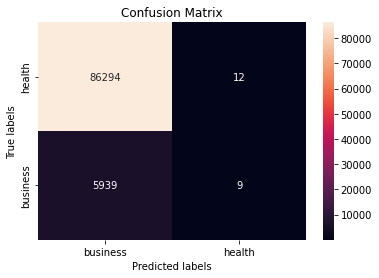

In [105]:
# Confusion Matrix
cm = confusion_matrix(y_test, predicted_logreg)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);
# Accuracy and ROC AUC
accuracy = accuracy_score(y_test, predicted_logreg)
roc_auc = roc_auc_score(y_test, probs_logreg)

print("Accuracy %:", round(accuracy*100,2))
print("ROC AUC %:", round(roc_auc*100,2))

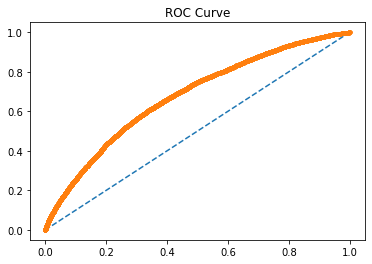

In [106]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_logreg)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
# show the plot
plt.show()

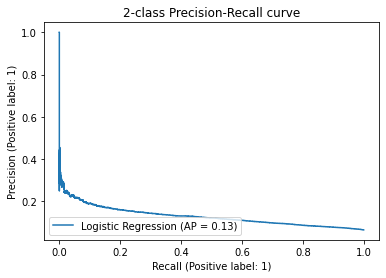

In [107]:
display = PrecisionRecallDisplay.from_predictions(y_test, probs_logreg, name="Logistic Regression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [108]:
# Iterrogate the best estimator on the final Logistic Regression model
print("Feature Selection Attributes:")
print(f"Number of features seen during fit: {pipe_final_logreg['ftrselect'].n_features_in_}")
print(f"Number of Features used in training: {pipe_final_logreg['logreg'].n_features_in_}")

print("")

print("Classifier Attributes:")
print(f"Coeficients: {pipe_final_logreg['logreg'].coef_}")
print(f"Intercept: {pipe_final_logreg['logreg'].intercept_}")

Feature Selection Attributes:
Number of features seen during fit: 223
Number of Features used in training: 223

Classifier Attributes:
Coeficients: [[-5.26861352e-02  3.89999979e-03  1.19587847e-01  2.65327874e-02
  -1.61749516e-01  4.79989622e-02  9.73491720e+00 -1.17149160e-01
   1.15040078e-02 -1.45569913e-03  7.23059191e-03  1.42464963e-03
   5.32246766e-03  5.21341449e-02 -8.93693630e-02 -6.30512599e-02
   2.37539253e-02 -1.23961729e-01  7.28829065e-02 -5.12285811e-02
  -3.90554433e-01 -4.08354993e-02  4.06104889e-01 -1.13203998e-01
  -1.46131653e-02  1.20407517e-01  5.96202639e-02  1.52238309e-03
  -3.65827737e-02  3.99635765e-02 -5.63746216e-03  2.84739429e-02
  -2.84739429e-02 -7.03031703e-04  1.27042358e+00 -1.35066683e-03
  -3.93019103e+00  7.89833396e-01 -6.86182977e-03 -1.02242404e-01
   1.54781706e+00 -6.43134191e-03 -1.03798255e-02  3.44101046e-03
  -5.74150176e-03  1.07468098e-02  1.02584265e-02 -4.00781902e-02
   8.46081690e-03  1.26738559e-02 -1.75495328e-02  6.0756883

# Multilayer Perception Model

## Create Function to Build a MLP Model

In [47]:
# Defaults from TF documentation (initialising the variables below):
# Dense layers: kernel_initializer='glorot_uniform',
# Optmizers (Adam, etc...): learning_rate=0.001

def build_mlp(n_input=100, n_hidden_layers=1, n_neurons=50, lr=0.001,
              init='glorot_uniform', loss='binary_crossentropy', optimizer='adam'):
    # define MLP architecture
    mlp_model = Sequential()
    mlp_model.add(InputLayer(input_shape=n_input))
    for new_layer in range(n_hidden_layers):
        mlp_model.add(Dense(n_neurons, kernel_initializer=init, activation='relu'))
    mlp_model.add(Dense(1, activation='sigmoid'))
    
    optimizers_dic = {'adadelta': Adadelta(learning_rate=lr),
               'adagrad': Adagrad(learning_rate=lr),
               'adam': Adam(learning_rate=lr),
               'adamax': Adamax(learning_rate=lr)}

    # Compile MLP
    mlp_model.compile(loss=loss, optimizer=optimizers_dic[optimizer], metrics=['accuracy', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

    return mlp_model

## Create Pipeline: (Scaler + (Scaler -> PCA)) -> MLP

Create Pipelie with all steps to be used in the Grid Search CV

In [74]:
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True, monitor='loss')
mlp_model = KerasClassifier(model=build_mlp, callbacks=[early_stopping_cb])

mlp_pipeline = Pipeline(steps=[
    ('dtprocess', FeatureUnion([('scaler', StandardScaler()),('ScalerPCA', Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=100))]))])),
    ('mlp_model', mlp_model)])

Visualise the dataset created after the data pre-processing step

In [75]:
x_train_visual = mlp_pipeline['dtprocess'].fit_transform(x_train)
x_train_visual = pd.DataFrame(x_train_visual)
x_train_visual.shape

(215257, 223)

## Define Parameters to be Tested

Visualise Intervals for Random Search

In [78]:
n_hidden_layers = [int(x) for x in np.linspace(start = 1, stop = 3, num = 3)]
n_neurons = [int(x) for x in np.linspace(start = 50, stop = 150, num = 6)]
n_epochs = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]

print(n_hidden_layers, n_neurons, n_epochs)

[1, 2, 3] [50, 70, 90, 110, 130, 150] [10, 20, 30, 40, 50]


In [80]:
# Create grid with parameters to test accurracy using k-Fold CV
n_vars = [223]
n_hidden_layers = [int(x) for x in np.linspace(start = 1, stop = 3, num = 3)]
n_neurons = [int(x) for x in np.linspace(start = 50, stop = 150, num = 6)]
n_epochs = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]
optimizers = ["adam", "adamax"]

mlp_paramdists = [
        {
        "mlp_model__model__n_input": n_vars,
        "mlp_model__model__n_hidden_layers": n_hidden_layers,
        "mlp_model__model__n_neurons": n_neurons,
        "mlp_model__model__optimizer": optimizers,
        "mlp_model__epochs": n_epochs
       }]

mlp_scoring = {
             "roc_auc": "roc_auc",
             "accuracy": "accuracy"
              }

sart_ttime = time.time()

mlp_grid = RandomizedSearchCV(mlp_pipeline, mlp_paramdists, n_iter=5, scoring=mlp_scoring, refit="roc_auc", cv=3, n_jobs=-1, verbose=1, random_state=7)
mlp_grid.fit(x_train, y_train)

print(f"Time taken (m): {round((time.time()-sart_ttime)/60,0)}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Epoch 1/20
6727/6727 [==============================] - 20s 3ms/step - loss: 0.2374 - accuracy: 0.9333 - auc: 0.6544 - true_positives: 26.0000 - true_negatives: 200868.0000 - false_positives: 509.0000 - false_negatives: 13854.0000
Epoch 2/20
6727/6727 [==============================] - 17s 2ms/step - loss: 0.2259 - accuracy: 0.9355 - auc: 0.6868 - true_positives: 0.0000e+00 - true_negatives: 201374.0000 - false_positives: 3.0000 - false_negatives: 13880.0000
Epoch 3/20
6727/6727 [==============================] - 17s 3ms/step - loss: 0.2241 - accuracy: 0.9355 - auc: 0.6959 - true_positives: 0.0000e+00 - true_negatives: 201370.0000 - false_positives: 7.0000 - false_negatives: 13880.0000
Epoch 4/20
6727/6727 [==============================] - 18s 3ms/step - loss: 0.2224 - accuracy: 0.9355 - auc: 0.7050 - true_positives: 1.0000 - true_negatives: 201367.0000 - false_positives: 10.0000 - false_negatives: 13879.0000
Epoch 5/20
6727/

Visualise Pipeline and RandomSearch

In [81]:
mlp_grid

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('dtprocess',
                                              FeatureUnion(transformer_list=[('scaler',
                                                                              StandardScaler()),
                                                                             ('ScalerPCA',
                                                                              Pipeline(steps=[('scaler',
                                                                                               StandardScaler()),
                                                                                              ('pca',
                                                                                               PCA(n_components=100))]))])),
                                             ('mlp_model',
                                              KerasClassifier(callbacks=[<keras.callbacks.EarlyStopping object at 0x0000023FB5D040A0>], model=<function build_mlp at 0x0000023F...
                   n_iter=5, n_jobs=-1,
                   param_distributions=[{'mlp_model__epochs': [10, 20, 30, 40,
                                                               50],
                                         'mlp_model__model__n_hidden_layers': [1,
                                                                               2,
                                                                               3],
                                         'mlp_model__model__n_input': [223],
                                         'mlp_model__model__n_neurons': [50, 70,
                                                                         90,
                                                                         110,
                                                                         130,
                                                                         150],
                                         'mlp_model__model__optimizer': ['adam',
                                                                         'adamax']}],
                   random_state=7, refit='roc_auc',
                   scoring={'accuracy': 'accuracy', 'roc_auc': 'roc_auc'},
                   verbose=1)

## Review Grid Search Results and Analyse Best Estimators

In [82]:
print(f"Best Score: {mlp_grid.best_score_}\n")
print(f"Best Estimator: {mlp_grid.best_estimator_}\n")
print(f"Best Parameters: {mlp_grid.best_params_}\n")

results = pd.DataFrame(mlp_grid.cv_results_).sort_values(by=['rank_test_roc_auc']).head()
results.to_excel("results_randomsearch_mpl.xlsx")
results


Best Score: 0.6993626390590619

Best Estimator: Pipeline(steps=[('dtprocess',
                 FeatureUnion(transformer_list=[('scaler', StandardScaler()),
                                                ('ScalerPCA',
                                                 Pipeline(steps=[('scaler',
                                                                  StandardScaler()),
                                                                 ('pca',
                                                                  PCA(n_components=100))]))])),
                ('mlp_model',
                 KerasClassifier(callbacks=[<keras.callbacks.EarlyStopping object at 0x0000023FB5E972E0>], epochs=20, model=<function build_mlp at 0x0000023F57BA5360>, model__n_hidden_layers=1, model__n_input=223, model__n_neurons=50, model__optimizer='adam'))])

Best Parameters: {'mlp_model__model__optimizer': 'adam', 'mlp_model__model__n_neurons': 50, 'mlp_model__model__n_input': 223, 'mlp_model__model__n_hidden_laye

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp_model__model__optimizer,param_mlp_model__model__n_neurons,param_mlp_model__model__n_input,param_mlp_model__model__n_hidden_layers,param_mlp_model__epochs,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
1,739.91,36.53,44.66,0.22,adam,50,223,1,20,"{'mlp_model__model__optimizer': 'adam', 'mlp_m...",0.71,0.69,0.70,0.70,0.00,1,0.94,0.93,0.94,0.94,0.00,1
2,"1,795.08",10.48,45.94,0.93,adamax,50,223,3,50,"{'mlp_model__model__optimizer': 'adamax', 'mlp...",0.67,0.66,0.66,0.66,0.01,2,0.93,0.93,0.93,0.93,0.00,2
4,"1,371.84",470.64,33.62,27.75,adam,110,223,2,40,"{'mlp_model__model__optimizer': 'adam', 'mlp_m...",0.65,0.65,0.63,0.65,0.01,3,0.93,0.93,0.93,0.93,0.00,3
0,"1,784.13",17.51,38.33,5.72,adam,110,223,3,40,"{'mlp_model__model__optimizer': 'adam', 'mlp_m...",0.63,0.64,0.64,0.64,0.00,4,0.93,0.93,0.93,0.93,0.00,4
3,"1,937.83",35.79,55.21,27.18,adamax,150,223,3,40,"{'mlp_model__model__optimizer': 'adamax', 'mlp...",0.63,0.62,0.62,0.62,0.00,5,0.91,0.91,0.91,0.91,0.00,5


Visualise Best Estimator

## Iterrogate each Pipeline step from Best Estimator

In [83]:
# # Check attributes available for MLPs

# print("Feature Selection Attributes:")
# print(f"Number of features seen during fit: {mlp_grid.best_estimator_.named_steps['ftrselect'].n_features_in_}")
# print(f"Scores of features: {mlp_grid.best_estimator_.named_steps['ftrselect'].scores_}")
print(f"Number of Features used in training: {mlp_grid.best_estimator_.named_steps['mlp_model'].n_features_in_}")

# print("")

# print("Classifier Attributes:")
# print(f"Coeficients: {mlp_grid.best_estimator_.named_steps['mlp_model'].coef_}")
# print(f"Intercept: {mlp_grid.best_estimator_.named_steps['mlp_model'].intercept_}")

Number of Features used in training: 223


## Fit and Predict the best estimators using Train and Test datasets

In [89]:
# Pipeline for best data pre-processing and feature selection
final_mlp_pipeline = Pipeline(steps=[
    ('dtprocess', FeatureUnion([('scaler', StandardScaler()),('ScalerPCA', Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=100))]))])),
    # ('ftrselect', SelectKBest(k=n_vars))
                            ])

sart_ttime = time.time()

x_train_processed = final_mlp_pipeline.fit_transform(x_train, y_train)
x_train_processed = pd.DataFrame(x_train_processed)

x_test_processed = final_mlp_pipeline.transform(x_test)
x_test_processed = pd.DataFrame(x_test_processed)

# Build final model with best parameters from cross validation
def build_final_mlp(n_input=223, n_hidden_layers=1, n_neurons=50,optimizer='adam',
                    lr=0.001, init='glorot_uniform', loss='binary_crossentropy'):
    # define MLP architecture
    mlp_model = Sequential()
    mlp_model.add(InputLayer(input_shape=n_input))
    for new_layer in range(n_hidden_layers):
        mlp_model.add(Dense(n_neurons, kernel_initializer=init, activation='relu'))
    mlp_model.add(Dense(1, activation='sigmoid'))
    
    optimizers_dic = {'adadelta': Adadelta(learning_rate=lr),
               'adagrad': Adagrad(learning_rate=lr),
               'adam': Adam(learning_rate=lr),
               'adamax': Adamax(learning_rate=lr)}

    # Compile MLP
    mlp_model.compile(loss=loss, optimizer=optimizers_dic[optimizer], metrics=['accuracy', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

    return mlp_model


final_mlp_model = build_final_mlp()


# Create tag to be used with the TensorBoard to visualise epochs
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

# Fit
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True, verbose=1)
tensorboard_cb = TensorBoard(run_logdir)


final_mlp_model.fit(x_train_processed, y_train, validation_data=(x_test_processed, y_test), callbacks=[early_stopping_cb, tensorboard_cb], epochs=20)

# Predict
final_mlp_model_probs = final_mlp_model.predict(x_test_processed)
final_mlp_model_pred = np.where(final_mlp_model_probs > 0.5, 1,0)

print(f"Time taken (m): {round((time.time()-sart_ttime)/60,0)}")

Epoch 1/20
6727/6727 [==============================] - 28s 4ms/step - loss: 0.2338 - accuracy: 0.9348 - auc: 0.6553 - true_positives: 23.0000 - true_negatives: 201202.0000 - false_positives: 175.0000 - false_negatives: 13857.0000 - val_loss: 0.2304 - val_accuracy: 0.9353 - val_auc: 0.6708 - val_true_positives: 0.0000e+00 - val_true_negatives: 86281.0000 - val_false_positives: 25.0000 - val_false_negatives: 5948.0000
Epoch 2/20
6727/6727 [==============================] - 31s 5ms/step - loss: 0.2259 - accuracy: 0.9355 - auc: 0.6864 - true_positives: 0.0000e+00 - true_negatives: 201372.0000 - false_positives: 5.0000 - false_negatives: 13880.0000 - val_loss: 0.2290 - val_accuracy: 0.9355 - val_auc: 0.6836 - val_true_positives: 0.0000e+00 - val_true_negatives: 86306.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 5948.0000
Epoch 3/20
6727/6727 [==============================] - 24s 4ms/step - loss: 0.2244 - accuracy: 0.9355 - auc: 0.6945 - true_positives: 0.0000e+00 - true_n

Accuracy %: 93.54
ROC AUC %: 69.81


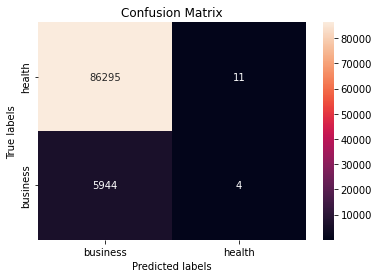

In [90]:
# Confusion Matrix
cm = confusion_matrix(y_test, final_mlp_model_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);
# Accuracy and ROC AUC
accuracy = accuracy_score(y_test, final_mlp_model_pred)
roc_auc = roc_auc_score(y_test, final_mlp_model_probs)

print("Accuracy %:", round(accuracy*100,2))
print("ROC AUC %:", round(roc_auc*100,2))

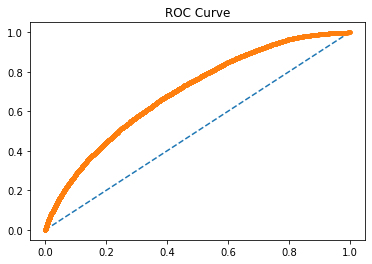

In [91]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, final_mlp_model_probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
# show the plot
plt.show()

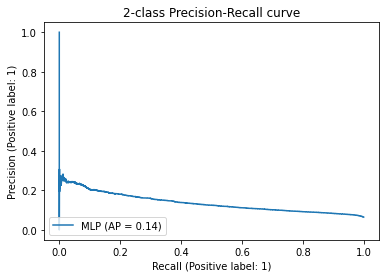

In [92]:
display = PrecisionRecallDisplay.from_predictions(y_test, final_mlp_model_probs, name="MLP")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
# # Iterrogate the best estimator on the final Logistic Regression model
# print("Feature Selection Attributes:")
# print(f"Number of features seen during fit: {final_mlp_pipeline['ftrselect'].n_features_in_}")
# print(f"Scores of features: {pipe_final_logreg['ftrselect'].scores_}")
# print(f"Number of Features used in training: {final_mlp_pipeline['mlp_model'].n_features_in_}")

# print("")

# print("Classifier Attributes:")
# print(f"Coeficients: {final_mlp_pipeline['mlp_model'].coef_}")
# print(f"Intercept: {final_mlp_pipeline['mlp_model'].intercept_}")

In [ ]:
# Save model

# Transform Probabilities Into Index and Categories

In [109]:
x_test = x_test.reset_index(drop=True)
x_test

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_BUR,DAYS_CREDIT_ENDDATE_BUR,DAYS_ENDDATE_FACT_BUR,AMT_CREDIT_SUM_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_LIMIT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,AMT_ANNUITY_BUR,NUMBER_OF_ACTIVE_LOANS_BUR,NUMBER_OF_CLOSED_LOANS_BUR,APP_DEBT_TO_INCOME,APP_ANNUITY_TO_INCOME,APP_TERM,BUR_DEBT_TO_INCOME,BUR_LIM_TO_INCOME,BUR_ANNUITY_TO_INCOME,BUR_TERM,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,1,2,"135,000.00","1,007,761.50","40,095.00",-2005,4.00,0.00,0.00,0.00,0.00,0.00,0.00,-389.00,"1,088.00",-556.00,"1,349,100.00","222,124.50",0.00,0.00,0.00,1.00,3.00,0.62,0.02,2.09,0.83,0.00,0.00,0.00,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,"180,000.00","561,384.00","57,654.00",-2932,3.00,0.00,0.00,0.00,0.00,0.00,0.00,"-1,492.00","-1,400.00","-1,432.00","14,809.50",0.00,0.

In [110]:
y_test = y_test.reset_index(drop=True)
y_test[y_test == 1]

9        1
14       1
33       1
35       1
78       1
        ..
92174    1
92175    1
92184    1
92222    1
92238    1
Name: TARGET_NEW, Length: 5948, dtype: int32

In [111]:
# x_test Y_test

x_test_cats = x_test.merge(y_test, how='left', left_index=True, right_index=True)
x_test_cats[x_test_cats['TARGET_NEW'] == 1]

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_BUR,DAYS_CREDIT_ENDDATE_BUR,DAYS_ENDDATE_FACT_BUR,AMT_CREDIT_SUM_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_LIMIT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,AMT_ANNUITY_BUR,NUMBER_OF_ACTIVE_LOANS_BUR,NUMBER_OF_CLOSED_LOANS_BUR,APP_DEBT_TO_INCOME,APP_ANNUITY_TO_INCOME,APP_TERM,BUR_DEBT_TO_INCOME,BUR_LIM_TO_INCOME,BUR_ANNUITY_TO_INCOME,BUR_TERM,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,TARGET_NEW
9,0,0,0,"135,000.00","343,377.00","16,830.00",-983,1.00,0.00,0.00,0.00,0.00,0.00,3.00,-742.00,355.00,-595.00,"1,662,745.50","322,146.00",0.00,0.00,0.00,1.00,2.00,0.21,0.01,1.70,1.03,0.00,0.00,0.00,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14,0,1,1,"112,500.00","364,896.00","19,926.00",-2588,3.00,0.00,0.00,0.00,0.00,1.00,0.00,-27.00,"1,739.00",-365.00,"1,027,072.21","101,79

In [112]:
scaled_final_mlp_model_probs = pd.DataFrame(MinMaxScaler().fit_transform(final_mlp_model_probs)*100)
x_test_cats = x_test_cats.merge(scaled_final_mlp_model_probs, how='left', left_index=True, right_index=True)
x_test_cats.rename(columns={0: "IDB_INDEX"}, inplace=True)

In [113]:
x_test_cats[x_test_cats['TARGET_NEW'] == 1].sort_values("IDB_INDEX", ascending=False)

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_BUR,DAYS_CREDIT_ENDDATE_BUR,DAYS_ENDDATE_FACT_BUR,AMT_CREDIT_SUM_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_LIMIT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,AMT_ANNUITY_BUR,NUMBER_OF_ACTIVE_LOANS_BUR,NUMBER_OF_CLOSED_LOANS_BUR,APP_DEBT_TO_INCOME,APP_ANNUITY_TO_INCOME,APP_TERM,BUR_DEBT_TO_INCOME,BUR_LIM_TO_INCOME,BUR_ANNUITY_TO_INCOME,BUR_TERM,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,TARGET_NEW,IDB_INDEX
84264,0,0,1,"135,000.00","697,500.00","27,157.50",-3103,3.00,0.00,0.00,0.00,0.00,0.00,1.00,-96.00,683.00,-61.00,"2,388,604.50","505,585.35","1,249.65",0.00,0.00,3.00,4.00,0.43,0.02,2.14,1.47,0.00,0.00,0.00,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,86.36
29382,0,1,0,"157,500.00","312,768.00","19,030.50",-2572,2.00,0.00,0.00,0.00,0.00,2.00,5.00,-81.00,"27,379.00",-

In [114]:
x_test_cats['IDB_INDEX'].describe()

count   92,254.00
mean         8.67
std          7.44
min          0.00
25%          3.21
50%          6.72
75%         12.00
max        100.00
Name: IDB_INDEX, dtype: float64

In [115]:
tertile = x_test_cats['IDB_INDEX'].quantile([.33, .66, 1])
print(tertile)

0.33     4.29
0.66     9.73
1.00   100.00
Name: IDB_INDEX, dtype: float64


Creating the Categories

In [116]:
x_test_cats = x_test_cats.assign(
    IDB_CAT = np.where(x_test_cats['IDB_INDEX'] <= tertile.iloc[0], 'Low',
              np.where(x_test_cats['IDB_INDEX'] <= tertile.iloc[1], 'Medium',
              np.where(x_test_cats['IDB_INDEX'] <= tertile.iloc[2], 'High',
              'Other'))))
x_test_cats.head(5)

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_BUR,DAYS_CREDIT_ENDDATE_BUR,DAYS_ENDDATE_FACT_BUR,AMT_CREDIT_SUM_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_LIMIT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,AMT_ANNUITY_BUR,NUMBER_OF_ACTIVE_LOANS_BUR,NUMBER_OF_CLOSED_LOANS_BUR,APP_DEBT_TO_INCOME,APP_ANNUITY_TO_INCOME,APP_TERM,BUR_DEBT_TO_INCOME,BUR_LIM_TO_INCOME,BUR_ANNUITY_TO_INCOME,BUR_TERM,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,TARGET_NEW,IDB_INDEX,IDB_CAT
0,0,1,2,"135,000.00","1,007,761.50","40,095.00",-2005,4.00,0.00,0.00,0.00,0.00,0.00,0.00,-389.00,"1,088.00",-556.00,"1,349,100.00","222,124.50",0.00,0.00,0.00,1.00,3.00,0.62,0.02,2.09,0.83,0.00,0.00,0.00,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.89,High
1,0,1,1,"180,000.00","561,384.00","57,654.00",-2932,3.00,0.00,0.00,0.00,0.00,0.00,0.00,"-1,492.00","

In [118]:
# x_test_cats_means = x_test_cats.groupby('IDB_CAT').mean().reindex(['Low', 'Medium', 'High'])

x_test_cats_profile = x_test_cats.groupby('IDB_CAT').agg({
    'IDB_CAT': np.count_nonzero,
    'CNT_CHILDREN': np.mean,
    'AMT_INCOME_TOTAL': np.mean,
    'AMT_CREDIT': np.mean,
    'AMT_ANNUITY': np.mean,
    'DAYS_EMPLOYED': np.mean,
    'CNT_FAM_MEMBERS': np.mean,
    'DAYS_CREDIT_BUR': np.mean,
    'DAYS_CREDIT_ENDDATE_BUR': np.mean,
    'DAYS_ENDDATE_FACT_BUR': np.mean,
    'AMT_CREDIT_SUM_BUR': np.mean,
    'AMT_CREDIT_SUM_DEBT_BUR': np.mean,
    'AMT_CREDIT_SUM_LIMIT_BUR': np.mean,
    'AMT_CREDIT_SUM_OVERDUE_BUR': np.mean,
    'AMT_ANNUITY_BUR': np.mean,
    'NUMBER_OF_ACTIVE_LOANS_BUR': np.mean,
    'NUMBER_OF_CLOSED_LOANS_BUR': np.mean,
    'APP_DEBT_TO_INCOME': np.mean,
    'APP_ANNUITY_TO_INCOME': np.mean,
    'APP_TERM': np.mean,
    'BUR_DEBT_TO_INCOME': np.mean,
    'BUR_LIM_TO_INCOME': np.mean,
    'BUR_ANNUITY_TO_INCOME': np.mean,
    'BUR_TERM': np.mean,
    
    'FLAG_OWN_CAR': np.count_nonzero,
    'FLAG_OWN_REALTY': np.count_nonzero,
    'NAME_CONTRACT_TYPE_Cash loans': np.count_nonzero,
    'NAME_CONTRACT_TYPE_Revolving loans': np.count_nonzero,
    'NAME_INCOME_TYPE_Businessman': np.count_nonzero,
    'NAME_INCOME_TYPE_Commercial associate': np.count_nonzero,
    'NAME_INCOME_TYPE_Maternity leave': np.count_nonzero,
    'NAME_INCOME_TYPE_Pensioner': np.count_nonzero,
    'NAME_INCOME_TYPE_State servant': np.count_nonzero,
    'NAME_INCOME_TYPE_Student': np.count_nonzero,
    'NAME_INCOME_TYPE_Unemployed': np.count_nonzero,
    'NAME_INCOME_TYPE_Working': np.count_nonzero,
    'NAME_HOUSING_TYPE_Co-op apartment': np.count_nonzero,
    'NAME_HOUSING_TYPE_House / apartment': np.count_nonzero,
    'NAME_HOUSING_TYPE_Municipal apartment': np.count_nonzero,
    'NAME_HOUSING_TYPE_Office apartment': np.count_nonzero,
    'NAME_HOUSING_TYPE_Rented apartment': np.count_nonzero,
    'NAME_HOUSING_TYPE_With parents': np.count_nonzero,
    'OCCUPATION_TYPE_Accountants': np.count_nonzero,
    'OCCUPATION_TYPE_Cleaning staff': np.count_nonzero,
    'OCCUPATION_TYPE_Cooking staff': np.count_nonzero,
    'OCCUPATION_TYPE_Core staff': np.count_nonzero,
    'OCCUPATION_TYPE_Drivers': np.count_nonzero,
    'OCCUPATION_TYPE_HR staff': np.count_nonzero,
    'OCCUPATION_TYPE_High skill tech staff': np.count_nonzero,
    'OCCUPATION_TYPE_IT staff': np.count_nonzero,
    'OCCUPATION_TYPE_Laborers': np.count_nonzero,
    'OCCUPATION_TYPE_Low-skill Laborers': np.count_nonzero,
    'OCCUPATION_TYPE_Managers': np.count_nonzero,
    'OCCUPATION_TYPE_Medicine staff': np.count_nonzero,
    'OCCUPATION_TYPE_Private service staff': np.count_nonzero,
    'OCCUPATION_TYPE_Realty agents': np.count_nonzero,
    'OCCUPATION_TYPE_Sales staff': np.count_nonzero,
    'OCCUPATION_TYPE_Secretaries': np.count_nonzero,
    'OCCUPATION_TYPE_Security staff': np.count_nonzero,
    'OCCUPATION_TYPE_Waiters/barmen staff': np.count_nonzero,
    'ORGANIZATION_TYPE_Advertising': np.count_nonzero,
    'ORGANIZATION_TYPE_Agriculture': np.count_nonzero,
    'ORGANIZATION_TYPE_Bank': np.count_nonzero,
    'ORGANIZATION_TYPE_Business Entity Type 1': np.count_nonzero,
    'ORGANIZATION_TYPE_Business Entity Type 2': np.count_nonzero,
    'ORGANIZATION_TYPE_Business Entity Type 3': np.count_nonzero,
    'ORGANIZATION_TYPE_Cleaning': np.count_nonzero,
    'ORGANIZATION_TYPE_Construction': np.count_nonzero,
    'ORGANIZATION_TYPE_Culture': np.count_nonzero,
    'ORGANIZATION_TYPE_Electricity': np.count_nonzero,
    'ORGANIZATION_TYPE_Emergency': np.count_nonzero,
    'ORGANIZATION_TYPE_Government': np.count_nonzero,
    'ORGANIZATION_TYPE_Hotel': np.count_nonzero,
    'ORGANIZATION_TYPE_Housing': np.count_nonzero,
    'ORGANIZATION_TYPE_Industry: type 1': np.count_nonzero,
    'ORGANIZATION_TYPE_Industry: type 10': np.count_nonzero,
    'ORGANIZATION_TYPE_Industry: type 11': np.count_nonzero,
    'ORGANIZATION_TYPE_Industry: type 12': np.count_nonzero,
    'ORGANIZATION_TYPE_Industry: type 13': np.count_nonzero,
    'ORGANIZATION_TYPE_Industry: type 2': np.count_nonzero,
    'ORGANIZATION_TYPE_Industry: type 3': np.count_nonzero,
    'ORGANIZATION_TYPE_Industry: type 4': np.count_nonzero,
    'ORGANIZATION_TYPE_Industry: type 5': np.count_nonzero,
    'ORGANIZATION_TYPE_Industry: type 6': np.count_nonzero,
    'ORGANIZATION_TYPE_Industry: type 7': np.count_nonzero,
    'ORGANIZATION_TYPE_Industry: type 8': np.count_nonzero,
    'ORGANIZATION_TYPE_Industry: type 9': np.count_nonzero,
    'ORGANIZATION_TYPE_Insurance': np.count_nonzero,
    'ORGANIZATION_TYPE_Kindergarten': np.count_nonzero,
    'ORGANIZATION_TYPE_Legal Services': np.count_nonzero,
    'ORGANIZATION_TYPE_Medicine': np.count_nonzero,
    'ORGANIZATION_TYPE_Military': np.count_nonzero,
    'ORGANIZATION_TYPE_Mobile': np.count_nonzero,
    'ORGANIZATION_TYPE_Other': np.count_nonzero,
    'ORGANIZATION_TYPE_Police': np.count_nonzero,
    'ORGANIZATION_TYPE_Postal': np.count_nonzero,
    'ORGANIZATION_TYPE_Realtor': np.count_nonzero,
    'ORGANIZATION_TYPE_Religion': np.count_nonzero,
    'ORGANIZATION_TYPE_Restaurant': np.count_nonzero,
    'ORGANIZATION_TYPE_School': np.count_nonzero,
    'ORGANIZATION_TYPE_Security': np.count_nonzero,
    'ORGANIZATION_TYPE_Security Ministries': np.count_nonzero,
    'ORGANIZATION_TYPE_Self-employed': np.count_nonzero,
    'ORGANIZATION_TYPE_Services': np.count_nonzero,
    'ORGANIZATION_TYPE_Telecom': np.count_nonzero,
    'ORGANIZATION_TYPE_Trade: type 1': np.count_nonzero,
    'ORGANIZATION_TYPE_Trade: type 2': np.count_nonzero,
    'ORGANIZATION_TYPE_Trade: type 3': np.count_nonzero,
    'ORGANIZATION_TYPE_Trade: type 4': np.count_nonzero,
    'ORGANIZATION_TYPE_Trade: type 5': np.count_nonzero,
    'ORGANIZATION_TYPE_Trade: type 6': np.count_nonzero,
    'ORGANIZATION_TYPE_Trade: type 7': np.count_nonzero,
    'ORGANIZATION_TYPE_Transport: type 1': np.count_nonzero,
    'ORGANIZATION_TYPE_Transport: type 2': np.count_nonzero,
    'ORGANIZATION_TYPE_Transport: type 3': np.count_nonzero,
    'ORGANIZATION_TYPE_Transport: type 4': np.count_nonzero,
    'ORGANIZATION_TYPE_University': np.count_nonzero,
    'ORGANIZATION_TYPE_XNA': np.count_nonzero,
    'TARGET_NEW': np.count_nonzero
            }).reindex(['Low', 'Medium', 'High'])

x_test_cats_profile = x_test_cats_profile.assign(
    FLAG_OWN_CAR_PERC = (x_test_cats_profile['FLAG_OWN_CAR']/x_test_cats_profile['IDB_CAT'])*100,
    FLAG_OWN_REALTY_PERC = (x_test_cats_profile['FLAG_OWN_REALTY']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_CONTRACT_TYPE_Cash_loans_PERC = (x_test_cats_profile['NAME_CONTRACT_TYPE_Cash loans']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_CONTRACT_TYPE_Revolving_loans_PERC = (x_test_cats_profile['NAME_CONTRACT_TYPE_Revolving loans']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_INCOME_TYPE_Businessman_PERC = (x_test_cats_profile['NAME_INCOME_TYPE_Businessman']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_INCOME_TYPE_Commercial_associate_PERC = (x_test_cats_profile['NAME_INCOME_TYPE_Commercial associate']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_INCOME_TYPE_Maternity_leave_PERC = (x_test_cats_profile['NAME_INCOME_TYPE_Maternity leave']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_INCOME_TYPE_Pensioner_PERC = (x_test_cats_profile['NAME_INCOME_TYPE_Pensioner']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_INCOME_TYPE_State_servant_PERC = (x_test_cats_profile['NAME_INCOME_TYPE_State servant']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_INCOME_TYPE_Student_PERC = (x_test_cats_profile['NAME_INCOME_TYPE_Student']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_INCOME_TYPE_Unemployed_PERC = (x_test_cats_profile['NAME_INCOME_TYPE_Unemployed']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_INCOME_TYPE_Working_PERC = (x_test_cats_profile['NAME_INCOME_TYPE_Working']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_HOUSING_TYPE_Co_op_apartment_PERC = (x_test_cats_profile['NAME_HOUSING_TYPE_Co-op apartment']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_HOUSING_TYPE_House_apartment_PERC = (x_test_cats_profile['NAME_HOUSING_TYPE_House / apartment']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_HOUSING_TYPE_Municipal_apartment_PERC = (x_test_cats_profile['NAME_HOUSING_TYPE_Municipal apartment']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_HOUSING_TYPE_Office_apartment_PERC = (x_test_cats_profile['NAME_HOUSING_TYPE_Office apartment']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_HOUSING_TYPE_Rented_apartment_PERC = (x_test_cats_profile['NAME_HOUSING_TYPE_Rented apartment']/x_test_cats_profile['IDB_CAT'])*100,
    NAME_HOUSING_TYPE_With_parents_PERC = (x_test_cats_profile['NAME_HOUSING_TYPE_With parents']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Accountants_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Accountants']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Cleaning_staff_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Cleaning staff']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Cooking_staff_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Cooking staff']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Core_staff_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Core staff']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Drivers_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Drivers']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_HR_staff_PERC = (x_test_cats_profile['OCCUPATION_TYPE_HR staff']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_High_skill_tech_staff_PERC = (x_test_cats_profile['OCCUPATION_TYPE_High skill tech staff']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_IT_staff_PERC = (x_test_cats_profile['OCCUPATION_TYPE_IT staff']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Laborers_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Laborers']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Low_skill_Laborers_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Low-skill Laborers']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Managers_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Managers']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Medicine_staff_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Medicine staff']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Private_service_staff_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Private service staff']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Realty_agents_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Realty agents']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Sales_staff_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Sales staff']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Secretaries_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Secretaries']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Security_staff_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Security staff']/x_test_cats_profile['IDB_CAT'])*100,
    OCCUPATION_TYPE_Waiters_barmen_staff_PERC = (x_test_cats_profile['OCCUPATION_TYPE_Waiters/barmen staff']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Advertising_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Advertising']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Agriculture_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Agriculture']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Bank_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Bank']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Business_Entity_Type_1_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Business Entity Type 1']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Business_Entity_Type_2_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Business Entity Type 2']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Business_Entity_Type_3_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Business Entity Type 3']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Cleaning_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Cleaning']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Construction_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Construction']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Culture_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Culture']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Electricity_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Electricity']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Emergency_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Emergency']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Government_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Government']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Hotel_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Hotel']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Housing_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Housing']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Industry_type_1_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Industry: type 1']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Industry_type_10_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Industry: type 10']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Industry_type_11_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Industry: type 11']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Industry_type_12_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Industry: type 12']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Industry_type_13_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Industry: type 13']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Industry_type_2_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Industry: type 2']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Industry_type_3_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Industry: type 3']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Industry_type_4_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Industry: type 4']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Industry_type_5_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Industry: type 5']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Industry_type_6_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Industry: type 6']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Industry_type_7_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Industry: type 7']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Industry_type_8_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Industry: type 8']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Industry_type_9_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Industry: type 9']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Insurance_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Insurance']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Kindergarten_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Kindergarten']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Legal_Services_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Legal Services']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Medicine_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Medicine']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Military_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Military']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Mobile_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Mobile']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Other_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Other']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Police_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Police']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Postal_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Postal']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Realtor_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Realtor']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Religion_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Religion']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Restaurant_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Restaurant']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_School_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_School']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Security_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Security']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Security_Ministries_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Security Ministries']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Self_employed_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Self-employed']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Services_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Services']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Telecom_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Telecom']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Trade_type_1_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Trade: type 1']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Trade_type_2_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Trade: type 2']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Trade_type_3_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Trade: type 3']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Trade_type_4_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Trade: type 4']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Trade_type_5_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Trade: type 5']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Trade_type_6_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Trade: type 6']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Trade_type_7_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Trade: type 7']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Transport_type_1_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Transport: type 1']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Transport_type_2_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Transport: type 2']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Transport_type_3_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Transport: type 3']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_Transport_type_4_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_Transport: type 4']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_University_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_University']/x_test_cats_profile['IDB_CAT'])*100,
    ORGANIZATION_TYPE_XNA_PERC = (x_test_cats_profile['ORGANIZATION_TYPE_XNA']/x_test_cats_profile['IDB_CAT'])*100,
    TARGET_NEW_PERC = (x_test_cats_profile['TARGET_NEW']/x_test_cats_profile['IDB_CAT'])*100
    
    ).drop(
            ['FLAG_OWN_CAR',
            'FLAG_OWN_REALTY',
            'NAME_CONTRACT_TYPE_Cash loans',
            'NAME_CONTRACT_TYPE_Revolving loans',
            'NAME_INCOME_TYPE_Businessman',
            'NAME_INCOME_TYPE_Commercial associate',
            'NAME_INCOME_TYPE_Maternity leave',
            'NAME_INCOME_TYPE_Pensioner',
            'NAME_INCOME_TYPE_State servant',
            'NAME_INCOME_TYPE_Student',
            'NAME_INCOME_TYPE_Unemployed',
            'NAME_INCOME_TYPE_Working',
            'NAME_HOUSING_TYPE_Co-op apartment',
            'NAME_HOUSING_TYPE_House / apartment',
            'NAME_HOUSING_TYPE_Municipal apartment',
            'NAME_HOUSING_TYPE_Office apartment',
            'NAME_HOUSING_TYPE_Rented apartment',
            'NAME_HOUSING_TYPE_With parents',
            'OCCUPATION_TYPE_Accountants',
            'OCCUPATION_TYPE_Cleaning staff',
            'OCCUPATION_TYPE_Cooking staff',
            'OCCUPATION_TYPE_Core staff',
            'OCCUPATION_TYPE_Drivers',
            'OCCUPATION_TYPE_HR staff',
            'OCCUPATION_TYPE_High skill tech staff',
            'OCCUPATION_TYPE_IT staff',
            'OCCUPATION_TYPE_Laborers',
            'OCCUPATION_TYPE_Low-skill Laborers',
            'OCCUPATION_TYPE_Managers',
            'OCCUPATION_TYPE_Medicine staff',
            'OCCUPATION_TYPE_Private service staff',
            'OCCUPATION_TYPE_Realty agents',
            'OCCUPATION_TYPE_Sales staff',
            'OCCUPATION_TYPE_Secretaries',
            'OCCUPATION_TYPE_Security staff',
            'OCCUPATION_TYPE_Waiters/barmen staff',
            'ORGANIZATION_TYPE_Advertising',
            'ORGANIZATION_TYPE_Agriculture',
            'ORGANIZATION_TYPE_Bank',
            'ORGANIZATION_TYPE_Business Entity Type 1',
            'ORGANIZATION_TYPE_Business Entity Type 2',
            'ORGANIZATION_TYPE_Business Entity Type 3',
            'ORGANIZATION_TYPE_Cleaning',
            'ORGANIZATION_TYPE_Construction',
            'ORGANIZATION_TYPE_Culture',
            'ORGANIZATION_TYPE_Electricity',
            'ORGANIZATION_TYPE_Emergency',
            'ORGANIZATION_TYPE_Government',
            'ORGANIZATION_TYPE_Hotel',
            'ORGANIZATION_TYPE_Housing',
            'ORGANIZATION_TYPE_Industry: type 1',
            'ORGANIZATION_TYPE_Industry: type 10',
            'ORGANIZATION_TYPE_Industry: type 11',
            'ORGANIZATION_TYPE_Industry: type 12',
            'ORGANIZATION_TYPE_Industry: type 13',
            'ORGANIZATION_TYPE_Industry: type 2',
            'ORGANIZATION_TYPE_Industry: type 3',
            'ORGANIZATION_TYPE_Industry: type 4',
            'ORGANIZATION_TYPE_Industry: type 5',
            'ORGANIZATION_TYPE_Industry: type 6',
            'ORGANIZATION_TYPE_Industry: type 7',
            'ORGANIZATION_TYPE_Industry: type 8',
            'ORGANIZATION_TYPE_Industry: type 9',
            'ORGANIZATION_TYPE_Insurance',
            'ORGANIZATION_TYPE_Kindergarten',
            'ORGANIZATION_TYPE_Legal Services',
            'ORGANIZATION_TYPE_Medicine',
            'ORGANIZATION_TYPE_Military',
            'ORGANIZATION_TYPE_Mobile',
            'ORGANIZATION_TYPE_Other',
            'ORGANIZATION_TYPE_Police',
            'ORGANIZATION_TYPE_Postal',
            'ORGANIZATION_TYPE_Realtor',
            'ORGANIZATION_TYPE_Religion',
            'ORGANIZATION_TYPE_Restaurant',
            'ORGANIZATION_TYPE_School',
            'ORGANIZATION_TYPE_Security',
            'ORGANIZATION_TYPE_Security Ministries',
            'ORGANIZATION_TYPE_Self-employed',
            'ORGANIZATION_TYPE_Services',
            'ORGANIZATION_TYPE_Telecom',
            'ORGANIZATION_TYPE_Trade: type 1',
            'ORGANIZATION_TYPE_Trade: type 2',
            'ORGANIZATION_TYPE_Trade: type 3',
            'ORGANIZATION_TYPE_Trade: type 4',
            'ORGANIZATION_TYPE_Trade: type 5',
            'ORGANIZATION_TYPE_Trade: type 6',
            'ORGANIZATION_TYPE_Trade: type 7',
            'ORGANIZATION_TYPE_Transport: type 1',
            'ORGANIZATION_TYPE_Transport: type 2',
            'ORGANIZATION_TYPE_Transport: type 3',
            'ORGANIZATION_TYPE_Transport: type 4',
            'ORGANIZATION_TYPE_University',
            'ORGANIZATION_TYPE_XNA',
            'TARGET_NEW'], axis = 1)

x_test_cats_profile

,IDB_CAT,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,CNT_FAM_MEMBERS,DAYS_CREDIT_BUR,DAYS_CREDIT_ENDDATE_BUR,DAYS_ENDDATE_FACT_BUR,AMT_CREDIT_SUM_BUR,AMT_CREDIT_SUM_DEBT_BUR,AMT_CREDIT_SUM_LIMIT_BUR,AMT_CREDIT_SUM_OVERDUE_BUR,AMT_ANNUITY_BUR,NUMBER_OF_ACTIVE_LOANS_BUR,NUMBER_OF_CLOSED_LOANS_BUR,APP_DEBT_TO_INCOME,APP_ANNUITY_TO_INCOME,APP_TERM,BUR_DEBT_TO_INCOME,BUR_LIM_TO_INCOME,BUR_ANNUITY_TO_INCOME,BUR_TERM,FLAG_OWN_CAR_PERC,FLAG_OWN_REALTY_PERC,NAME_CONTRACT_TYPE_Cash_loans_PERC,NAME_CONTRACT_TYPE_Revolving_loans_PERC,NAME_INCOME_TYPE_Businessman_PERC,NAME_INCOME_TYPE_Commercial_associate_PERC,NAME_INCOME_TYPE_Maternity_leave_PERC,NAME_INCOME_TYPE_Pensioner_PERC,NAME_INCOME_TYPE_State_servant_PERC,NAME_INCOME_TYPE_Student_PERC,NAME_INCOME_TYPE_Unemployed_PERC,NAME_INCOME_TYPE_Working_PERC,NAME_HOUSING_TYPE_Co_op_apartment_PERC,NAME_HOUSING_TYPE_House_apartment_PERC,NAME_HOUSING_TYPE_Municipal_apartment_PERC,NAME_HOUSING_TYPE_Office_apartment_PERC,NAME_HOUSING_TYPE_Rented_apartment_PERC,NAME_HOUSING_TYPE_With_parents_PERC,OCCUPATION_TYPE_Accountants_PERC,OCCUPATION_TYPE_Cleaning_staff_PERC,OCCUPATION_TYPE_Cooking_staff_PERC,OCCUPATION_TYPE_Core_staff_PERC,OCCUPATION_TYPE_Drivers_PERC,OCCUPATION_TYPE_HR_staff_PERC,OCCUPATION_TYPE_High_skill_tech_staff_PERC,OCCUPATION_TYPE_IT_staff_PERC,OCCUPATION_TYPE_Laborers_PERC,OCCUPATION_TYPE_Low_skill_Laborers_PERC,OCCUPATION_TYPE_Managers_PERC,OCCUPATION_TYPE_Medicine_staff_PERC,OCCUPATION_TYPE_Private_service_staff_PERC,OCCUPATION_TYPE_Realty_agents_PERC,OCCUPATION_TYPE_Sales_staff_PERC,OCCUPATION_TYPE_Secretaries_PERC,OCCUPATION_TYPE_Security_staff_PERC,OCCUPATION_TYPE_Waiters_barmen_staff_PERC,ORGANIZATION_TYPE_Advertising_PERC,ORGANIZATION_TYPE_Agriculture_PERC,ORGANIZATION_TYPE_Bank_PERC,ORGANIZATION_TYPE_Business_Entity_Type_1_PERC,ORGANIZATION_TYPE_Business_Entity_Type_2_PERC,ORGANIZATION_TYPE_Business_Entity_Type_3_PERC,ORGANIZATION_TYPE_Cleaning_PERC,ORGANIZATION_TYPE_Construction_PERC,ORGANIZATION_TYPE_Culture_PERC,ORGANIZATION_TYPE_Electricity_PERC,ORGANIZATION_TYPE_Emergency_PERC,ORGANIZATION_TYPE_Government_PERC,ORGANIZATION_TYPE_Hotel_PERC,ORGANIZATION_TYPE_Housing_PERC,ORGANIZATION_TYPE_Industry_type_1_PERC,ORGANIZATION_TYPE_Industry_type_10_PERC,ORGANIZATION_TYPE_Industry_type_11_PERC,ORGANIZATION_TYPE_Industry_type_12_PERC,ORGANIZATION_TYPE_Industry_type_13_PERC,ORGANIZATION_TYPE_Industry_type_2_PERC,ORGANIZATION_TYPE_Industry_type_3_PERC,ORGANIZATION_TYPE_Industry_type_4_PERC,ORGANIZATION_TYPE_Industry_type_5_PERC,ORGANIZATION_TYPE_Industry_type_6_PERC,ORGANIZATION_TYPE_Industry_type_7_PERC,ORGANIZATION_TYPE_Industry_type_8_PERC,ORGANIZATION_TYPE_Industry_type_9_PERC,ORGANIZATION_TYPE_Insurance_PERC,ORGANIZATION_TYPE_Kindergarten_PERC,ORGANIZATION_TYPE_Legal_Services_PERC,ORGANIZATION_TYPE_Medicine_PERC,ORGANIZATION_TYPE_Military_PERC,ORGANIZATION_TYPE_Mobile_PERC,ORGANIZATION_TYPE_Other_PERC,ORGANIZATION_TYPE_Police_PERC,ORGANIZATION_TYPE_Postal_PERC,ORGANIZATION_TYPE_Realtor_PERC,ORGANIZATION_TYPE_Religion_PERC,ORGANIZATION_TYPE_Restaurant_PERC,ORGANIZATION_TYPE_School_PERC,ORGANIZATION_TYPE_Security_PERC,ORGANIZATION_TYPE_Security_Ministries_PERC,ORGANIZATION_TYPE_Self_employed_PERC,ORGANIZATION_TYPE_Services_PERC,ORGANIZATION_TYPE_Telecom_PERC,ORGANIZATION_TYPE_Trade_type_1_PERC,ORGANIZATION_TYPE_Trade_type_2_PERC,ORGANIZATION_TYPE_Trade_type_3_PERC,ORGANIZATION_TYPE_Trade_type_4_PERC,ORGANIZATION_TYPE_Trade_type_5_PERC,ORGANIZATION_TYPE_Trade_type_6_PERC,ORGANIZATION_TYPE_Trade_type_7_PERC,ORGANIZATION_TYPE_Transport_type_1_PERC,ORGANIZATION_TYPE_Transport_type_2_PERC,ORGANIZATION_TYPE_Transport_type_3_PERC,ORGANIZATION_TYPE_Transport_type_4_PERC,ORGANIZATION_TYPE_University_PERC,ORGANIZATION_TYPE_XNA_PERC,TARGET_NEW_PERC
IDB_CAT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Low,30444,0.34,"175,288.90","646,516.38","28,238.18","83,488.20",2.08,-417.14,"1,528.44",-334.

Text(0.5, 1.0, 'BUR_DEBT_TO_INCOME')

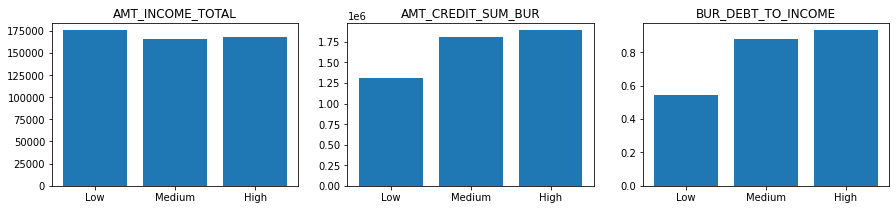

In [138]:
figure, axis = plt.subplots(1, 3, figsize=(15, 3))

axis[0].bar(['Low','Medium', 'High'], x_test_cats_profile["AMT_INCOME_TOTAL"])
axis[0].set_title("AMT_INCOME_TOTAL")

axis[1].bar(['Low','Medium', 'High'], x_test_cats_profile["AMT_CREDIT_SUM_BUR"])
axis[1].set_title("AMT_CREDIT_SUM_BUR")

axis[2].bar(['Low','Medium', 'High'], x_test_cats_profile["BUR_DEBT_TO_INCOME"])
axis[2].set_title("BUR_DEBT_TO_INCOME")

Text(0.5, 1.0, 'OCCUPATION_TYPE_Managers_PERC')

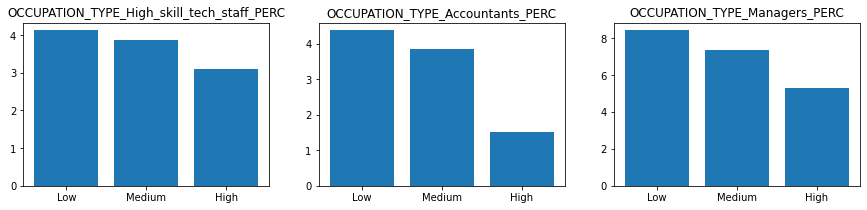

In [139]:
figure, axis = plt.subplots(1, 3, figsize=(15, 3))

axis[0].bar(['Low','Medium', 'High'], x_test_cats_profile["OCCUPATION_TYPE_High_skill_tech_staff_PERC"])
axis[0].set_title("OCCUPATION_TYPE_High_skill_tech_staff_PERC")

axis[1].bar(['Low','Medium', 'High'], x_test_cats_profile["OCCUPATION_TYPE_Accountants_PERC"])
axis[1].set_title("OCCUPATION_TYPE_Accountants_PERC")

axis[2].bar(['Low','Medium', 'High'], x_test_cats_profile["OCCUPATION_TYPE_Managers_PERC"])
axis[2].set_title("OCCUPATION_TYPE_Managers_PERC")

Text(0.5, 1.0, 'OCCUPATION_TYPE_Waiters_barmen_staff_PERC')

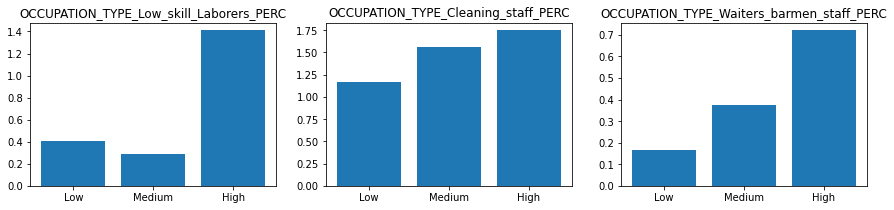

In [140]:
figure, axis = plt.subplots(1, 3, figsize=(15, 3))

axis[0].bar(['Low','Medium', 'High'], x_test_cats_profile["OCCUPATION_TYPE_Low_skill_Laborers_PERC"])
axis[0].set_title("OCCUPATION_TYPE_Low_skill_Laborers_PERC")

axis[1].bar(['Low','Medium', 'High'], x_test_cats_profile["OCCUPATION_TYPE_Cleaning_staff_PERC"])
axis[1].set_title("OCCUPATION_TYPE_Cleaning_staff_PERC")

axis[2].bar(['Low','Medium', 'High'], x_test_cats_profile["OCCUPATION_TYPE_Waiters_barmen_staff_PERC"])
axis[2].set_title("OCCUPATION_TYPE_Waiters_barmen_staff_PERC")


Text(0.5, 1.0, 'NAME_HOUSING_TYPE_Rented_apartment_PERC')

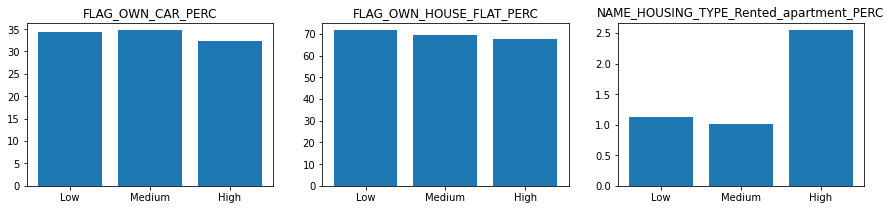

In [147]:
figure, axis = plt.subplots(1, 3, figsize=(15, 3))

axis[0].bar(['Low','Medium', 'High'], x_test_cats_profile["FLAG_OWN_CAR_PERC"])
axis[0].set_title("FLAG_OWN_CAR_PERC")

axis[1].bar(['Low','Medium', 'High'], x_test_cats_profile["FLAG_OWN_REALTY_PERC"])
axis[1].set_title("FLAG_OWN_HOUSE_FLAT_PERC")

axis[2].bar(['Low','Medium', 'High'], x_test_cats_profile["NAME_HOUSING_TYPE_Rented_apartment_PERC"])
axis[2].set_title("NAME_HOUSING_TYPE_Rented_apartment_PERC")

Text(0.5, 1.0, 'DAYS_CREDIT_ENDDATE_BUR')

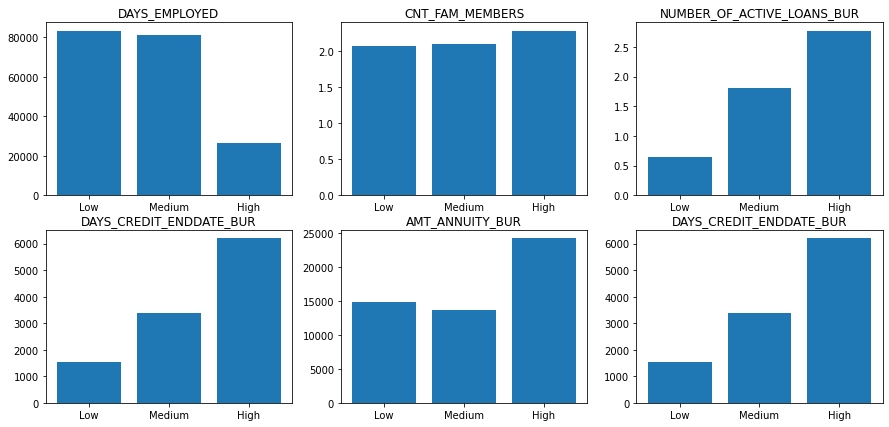

In [150]:
figure, axis = plt.subplots(2, 3, figsize=(15, 7))

axis[0,0].bar(['Low','Medium', 'High'], x_test_cats_profile["DAYS_EMPLOYED"])
axis[0,0].set_title("DAYS_EMPLOYED")

axis[0,1].bar(['Low','Medium', 'High'], x_test_cats_profile["CNT_FAM_MEMBERS"])
axis[0,1].set_title("CNT_FAM_MEMBERS")

axis[0,2].bar(['Low','Medium', 'High'], x_test_cats_profile["NUMBER_OF_ACTIVE_LOANS_BUR"])
axis[0,2].set_title("NUMBER_OF_ACTIVE_LOANS_BUR")

axis[1,0].bar(['Low','Medium', 'High'], x_test_cats_profile["DAYS_CREDIT_ENDDATE_BUR"])
axis[1,0].set_title("DAYS_CREDIT_ENDDATE_BUR")

axis[1,1].bar(['Low','Medium', 'High'], x_test_cats_profile["AMT_ANNUITY_BUR"])
axis[1,1].set_title("AMT_ANNUITY_BUR")

axis[1,2].bar(['Low','Medium', 'High'], x_test_cats_profile["DAYS_CREDIT_ENDDATE_BUR"])
axis[1,2].set_title("DAYS_CREDIT_ENDDATE_BUR")